In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [2]:
triplexes = pd.read_csv('basetriples_nosam_bal.csv', header=0, sep='\t')

In [3]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,111,R.4SU.8.R.A.14.R.A.46.,tWH_t.W_cSS,10.04_12.76_4.86,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,1
1,1b23.cif1_R,111,R.4SU.8.R.G.15.R.G.48.,-_t.W_cSS,12.32_13.49_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,1
2,1b23.cif1_R,111,R.A.9.R.A.13.R.A.22.,tHW_tSH_-,11.7_10.01_13.84,0,0,1,1,0,...,0,0,0,0,0,0,0,4,0,1
3,1b23.cif1_R,120,R.A.9.R.G.48.R.A.66.,-_-_-,8.54_16.53_20.72,1,0,0,0,1,...,0,0,0,0,0,0,0,7,1,0
4,1b23.cif1_R,100,R.A.14.R.C.62.R.C.71.,-_-_-,24.04_27.19_31.66,0,0,1,0,0,...,1,0,0,0,1,0,0,4,0,0


In [3]:
### !!!!! необходимые данные - train

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [4]:
triplexes_test = pd.read_csv('basetriples_sam_full.csv', header=0, sep='\t')

In [6]:
triplexes_test.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,2qwy.cif1_C,123,C.C.27.C.G.28.C.C.29.,-_-_-,4.8_5.65_10.0,1,0,0,1,0,...,1,0,0,0,0,0,1,11,3,0
1,2qwy.cif1_C,123,C.G.28.C.C.29.C.A.36.,-_-_-,5.65_5.84_5.42,1,0,0,0,1,...,1,0,0,0,0,0,1,11,0,0
2,2qwy.cif1_C,123,C.G.6.C.G.28.C.C.29.,-_-_-,8.34_5.65_10.44,1,0,0,1,0,...,1,0,0,0,0,0,1,11,3,0
3,2qwy.cif1_C,123,C.U.26.C.G.28.C.C.29.,-_-_-,9.76_5.65_14.44,1,0,0,1,0,...,1,0,0,0,0,0,1,11,3,0
4,2qwy.cif1_C,123,C.G.28.C.C.29.C.U.38.,-_-_-,5.65_12.35_6.96,1,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0


In [5]:
### !!!!! необходимые данные - test

triplexes_test_data = triplexes_test.iloc[:, 5:475]
triplexes_test_target = triplexes_test.iloc[:, 476]

In [6]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()
    
    
    
def probability_density(y_prob, y):
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')
    plt.show()


In [7]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [8]:
rf_classifier.fit(triplexes_data, triplexes_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [9]:
prediction_result = rf_classifier.predict(triplexes_test_data)
predict_proba = rf_classifier.predict_proba(triplexes_test_data)

In [10]:
#PREDICTED PROBABILITIES
for index, row in triplexes_test.iterrows():
    if triplexes_test_target[index] != prediction_result[index]:
        print(row['type'], row['dssrs'], row['bps'], row['dists'], "PROBA: ", predict_proba[index][1])

123 C.C.27.C.G.28.C.C.29. -_-_- 4.8_5.65_10.0 PROBA:  0.5093002646344967
123 C.G.6.C.G.28.C.C.29. -_-_- 8.34_5.65_10.44 PROBA:  0.5165183915746463
123 C.U.11.C.G.28.C.C.29. -_-_- 29.03_5.65_32.11 PROBA:  0.5458104033320983
123 C.A.13.C.G.28.C.C.29. -_-_- 38.82_5.65_40.76 PROBA:  0.5157981442162055
123 C.A.24.C.G.28.C.C.29. -_-_- 18.33_5.65_20.94 PROBA:  0.5066805296772773
123 C.G.6.C.C.29.C.A.35. -_-_- 10.44_7.34_10.18 PROBA:  0.5028234000199484
123 C.U.11.C.C.27.C.C.29. -_-_- 24.89_10.0_32.11 PROBA:  0.5738680098044685
123 C.U.12.C.C.27.C.C.29. -_-_- 29.08_10.0_35.22 PROBA:  0.5450792379523854
123 C.A.13.C.C.27.C.C.29. -_-_- 35.27_10.0_40.76 PROBA:  0.5486240021460961
123 C.U.18.C.C.27.C.C.29. -_-_- 31.34_10.0_36.44 PROBA:  0.5321427031818078
123 C.A.24.C.C.27.C.C.29. -_-_- 14.99_10.0_20.94 PROBA:  0.5506548856967881
123 C.C.27.C.C.29.C.U.40. -_-_- 10.0_19.22_10.14 PROBA:  0.5293907140548751
123 C.C.27.C.C.29.C.A.41. -_-_- 10.0_23.21_13.81 PROBA:  0.563374262132
123 C.G.6.C.G.8.C.C.29

123 C.U.18.C.A.24.C.A.36. -_-_- 25.32_22.85_35.74 PROBA:  0.5337298581595047
123 C.U.18.C.A.36.C.A.41. -_-_- 35.74_22.75_26.72 PROBA:  0.509967046338514
123 C.G.6.C.G.8.C.A.24. -_-_- 12.14_12.97_16.49 PROBA:  0.5215439457943049
123 C.C.23.C.U.26.C.A.41. -_-_- 14.48_8.81_14.34 PROBA:  0.5013373320754956
123 C.U.12.C.U.26.C.A.45. -_-_- 25.01_23.45_5.12 PROBA:  0.5004605092588073
123 C.U.18.C.U.26.C.A.46. -_-_- 29.21_26.44_14.31 PROBA:  0.5129355530082028
123 C.G.8.C.U.12.C.U.38. -_-_- 18.68_30.58_13.32 PROBA:  0.5017058051583023
123 C.G.8.C.A.24.C.U.38. -_-_- 12.97_17.71_13.32 PROBA:  0.5101509242917405
123 C.G.8.C.U.38.C.A.41. -_-_- 13.32_14.27_9.8 PROBA:  0.5119392630181205
123 C.C.23.C.U.38.C.C.43. -_-_- 20.9_22.7_7.32 PROBA:  0.5594354322367898
123 C.G.22.C.U.38.C.G.42. -_-_- 22.95_18.23_14.06 PROBA:  0.5788155863681902
123 C.U.38.C.G.42.C.C.43. -_-_- 18.23_5.98_22.7 PROBA:  0.5243558946269502
123 C.A.9.C.A.24.C.U.38. -_-_- 13.28_17.71_17.34 PROBA:  0.5132207693698682
123 C.A.9.C.U.3

112 C.G.22.C.A.33.C.C.43. -_-_cWW 23.23_29.5_10.65 PROBA:  0.5775102741728885
112 C.G.22.C.A.35.C.C.43. -_-_cWW 26.31_31.09_10.65 PROBA:  0.548919845058331
112 C.G.22.C.A.36.C.C.43. -_-_cWW 26.06_28.9_10.65 PROBA:  0.6302171423556284
112 C.G.22.C.U.38.C.C.43. -_-_cWW 22.95_22.7_10.65 PROBA:  0.6344950578365727
112 C.G.8.C.G.22.C.C.43. -_cWW_- 14.94_10.65_14.33 PROBA:  0.7053928290322508
112 C.G.22.C.C.23.C.C.43. -_-_cWW 5.4_7.32_10.65 PROBA:  0.5698804441058163
112 C.G.22.C.G.42.C.C.43. -_-_cWW 14.06_5.98_10.65 PROBA:  0.5656705099192998
112 C.U.11.C.G.22.C.C.43. -_cWW_- 12.49_10.65_8.06 PROBA:  0.7124805342961615
112 C.U.12.C.G.22.C.C.43. -_cWW_- 12.65_10.65_11.37 PROBA:  0.7247478502408355
112 C.A.13.C.G.22.C.C.43. -_cWW_- 17.6_10.65_18.78 PROBA:  0.6615824327568189
112 C.U.18.C.G.22.C.C.43. -_cWW_- 18.9_10.65_22.83 PROBA:  0.7215208028075767
112 C.G.22.C.A.24.C.C.43. -_-_cWW 9.68_6.86_10.65 PROBA:  0.6513603523191862
112 C.G.22.C.U.40.C.C.43. -_-_cWW 15.68_13.51_10.65 PROBA:  0.5125

120 C.C.7.C.C.27.C.U.38. -_-_- 7.81_4.0_8.03 PROBA:  0.5377337035473294
120 C.G.8.C.G.25.C.C.27. -_-_- 10.8_10.43_13.46 PROBA:  0.5205987455189764
120 C.C.7.C.G.8.C.C.27. -_-_- 7.09_13.46_7.81 PROBA:  0.5328449503930263
120 C.C.27.C.G.32.C.G.42. -_-_- 18.11_29.44_16.89 PROBA:  0.5083670735728734
120 C.C.27.C.U.31.C.G.42. -_-_- 20.83_34.17_16.89 PROBA:  0.5183680004609631
120 C.A.9.C.G.25.C.C.27. -_-_- 12.22_10.43_17.4 PROBA:  0.5314049350428945
120 C.C.7.C.A.9.C.C.27. -_-_- 11.7_17.4_7.81 PROBA:  0.6006236144010023
120 C.A.9.C.C.27.C.G.30. -_-_- 17.4_15.09_30.14 PROBA:  0.5068880208937514
120 C.U.11.C.G.25.C.C.27. -_-_- 16.26_10.43_24.89 PROBA:  0.6728748064362727
120 C.C.7.C.U.11.C.C.27. -_-_- 20.02_24.89_7.81 PROBA:  0.5943721508642384
120 C.U.11.C.C.27.C.G.30. -_-_- 24.89_15.09_35.03 PROBA:  0.6730617290576505
120 C.U.12.C.G.25.C.C.27. -_-_- 20.49_10.43_29.08 PROBA:  0.6134035338482887
120 C.C.7.C.U.12.C.C.27. -_-_- 24.01_29.08_7.81 PROBA:  0.5732158876129357
120 C.U.12.C.C.27.C.G.3

120 C.U.38.C.G.39.C.A.41. -_-_- 4.5_12.9_14.27 PROBA:  0.6759021427730483
120 C.U.31.C.U.38.C.A.41. -_-_- 23.13_14.27_33.24 PROBA:  0.8008917476475104
120 C.A.37.C.U.38.C.A.41. -_-_- 4.72_14.27_18.52 PROBA:  0.6344775592362348
120 C.G.17.C.U.38.C.A.41. -_-_- 35.31_14.27_28.09 PROBA:  0.5017323084819434
120 C.G.8.C.A.9.C.A.19. -_-_- 4.69_18.1_18.47 PROBA:  0.6667647472679047
120 C.G.8.C.A.9.C.A.14. -_-_- 4.69_27.37_31.2 PROBA:  0.6715527866713988
120 C.G.8.C.G.32.C.C.43. -_-_- 25.73_29.84_14.33 PROBA:  0.5214478446227188
120 C.G.8.C.U.11.C.A.19. -_-_- 14.13_17.6_18.47 PROBA:  0.652890781975698
120 C.G.8.C.U.11.C.G.25. -_-_- 14.13_16.26_10.8 PROBA:  0.5027071248040447
120 C.G.8.C.U.10.C.U.11. -_-_- 9.69_5.22_14.13 PROBA:  0.6405654296432681
120 C.G.8.C.U.11.C.A.14. -_-_- 14.13_18.15_31.2 PROBA:  0.644652561103753
120 C.G.8.C.U.11.C.A.37. -_-_- 14.13_29.7_17.14 PROBA:  0.5159298102129632
120 C.G.8.C.U.11.C.G.17. -_-_- 14.13_15.5_22.24 PROBA:  0.5396448820521852
120 C.G.8.C.A.19.C.U.21. -_

0 C.C.7.C.G.25.C.G.39. cWW_-_- 10.76_12.84_5.88 PROBA:  0.5531306757664134
0 C.C.7.C.G.25.C.A.37. cWW_-_- 10.76_15.79_10.74 PROBA:  0.5644327076990439
0 C.C.7.C.G.17.C.G.25. -_-_cWW 27.78_29.22_10.76 PROBA:  0.6401705718022958
0 C.G.17.C.G.25.C.G.30. -_-_- 29.22_21.18_43.96 PROBA:  0.6019080327355201
0 C.C.7.C.G.25.C.G.30. cWW_-_- 10.76_21.18_19.82 PROBA:  0.5304330704373713
0 C.U.10.C.G.32.C.G.39. -_-_- 32.38_23.01_19.03 PROBA:  0.5753169116257153
0 C.U.10.C.G.32.C.A.37. -_-_- 32.38_17.96_25.99 PROBA:  0.5632686172419326
0 C.U.10.C.A.14.C.G.17. -_-_- 22.37_15.21_16.87 PROBA:  0.6546792737855776
0 C.U.10.C.U.31.C.G.39. -_-_- 37.56_25.85_19.03 PROBA:  0.5854740266478948
0 C.U.10.C.A.37.C.G.39. -_-_- 25.99_8.57_19.03 PROBA:  0.5109345269533552
0 C.U.10.C.U.31.C.A.37. -_-_- 37.56_19.28_25.99 PROBA:  0.5740198837059649
0 C.A.14.C.G.32.C.G.39. -_-_- 48.47_23.01_41.0 PROBA:  0.5412490325452649
0 C.U.31.C.G.32.C.G.39. -_-_- 6.02_23.01_25.85 PROBA:  0.695392053267146
0 C.G.32.C.A.37.C.G.39. -_

100 C.G.17.C.U.34.C.U.38. -_-_- 40.11_19.93_35.31 PROBA:  0.5299700517657199
100 C.C.7.C.G.25.C.U.38. cWW_-_- 10.76_12.77_8.03 PROBA:  0.5282909345772183
100 C.U.10.C.G.32.C.U.38. -_-_- 32.38_20.88_22.0 PROBA:  0.5125398419252108
100 C.U.10.C.U.31.C.U.38. -_-_- 37.56_23.13_22.0 PROBA:  0.5054577750559099
100 C.U.10.C.A.37.C.U.38. -_-_- 25.99_4.72_22.0 PROBA:  0.5632182737583059
100 C.G.32.C.U.38.C.G.39. -_-_- 20.88_4.5_23.01 PROBA:  0.6844685050237449
100 C.U.31.C.G.32.C.U.38. -_-_- 6.02_20.88_23.13 PROBA:  0.6267025338921612
100 C.G.32.C.A.37.C.U.38. -_-_- 17.96_4.72_20.88 PROBA:  0.7192578569991533
100 C.U.31.C.U.38.C.G.39. -_-_- 23.13_4.5_25.85 PROBA:  0.7607250594755283
100 C.A.37.C.U.38.C.G.39. -_-_- 4.72_4.5_8.57 PROBA:  0.5656451409798814
100 C.U.31.C.A.37.C.U.38. -_-_- 19.28_4.72_23.13 PROBA:  0.7112839704681742
100 C.G.8.C.A.19.C.A.47. -_tHS_- 18.47_9.69_21.44 PROBA:  0.5515694824086372
100 C.G.8.C.A.19.C.G.25. -_-_- 18.47_25.59_10.8 PROBA:  0.5262177416421452
100 C.G.8.C.U.10

110 C.G.17.C.U.20.C.A.46. -_cWW_- 13.98_10.24_14.68 PROBA:  0.713764195997057
110 C.U.20.C.U.44.C.A.46. -_-_cWW 17.56_10.84_10.24 PROBA:  0.7948936618414245
110 C.A.13.C.U.18.C.A.19. tWH_-_- 13.33_5.47_15.58 PROBA:  0.5784758887264221
110 C.A.13.C.U.18.C.A.47. tWH_-_- 13.33_10.15_7.66 PROBA:  0.5851088883011748
110 C.U.10.C.A.13.C.U.18. -_tWH_- 16.67_13.33_16.53 PROBA:  0.708237372397419
110 C.A.13.C.A.14.C.U.18. -_-_tWH 9.17_20.45_13.33 PROBA:  0.536534043551404
110 C.A.13.C.G.17.C.U.18. -_-_tWH 9.94_5.92_13.33 PROBA:  0.6726025861916878
110 C.A.19.C.A.24.C.U.40. -_cWW_- 23.77_10.76_22.57 PROBA:  0.5586906315419435
110 C.A.24.C.U.34.C.U.40. -_-_cWW 30.26_25.64_10.76 PROBA:  0.6731994541369895
110 C.A.24.C.G.32.C.U.40. -_-_cWW 23.62_24.63_10.76 PROBA:  0.660751867065756
110 C.A.24.C.G.39.C.U.40. -_-_cWW 17.49_8.08_10.76 PROBA:  0.772075255178888
110 C.A.24.C.U.31.C.U.40. -_-_cWW 28.63_28.81_10.76 PROBA:  0.6912758783716888
110 C.A.24.C.A.37.C.U.40. -_-_cWW 20.29_14.52_10.76 PROBA:  0.6

120 A.G.8.A.C.49.A.C.51. -_-_- 9.73_12.29_13.82 PROBA:  0.6032354115723279
120 A.G.8.A.A.43.A.A.52. -_-_- 16.49_26.72_14.05 PROBA:  0.5305838637613816
120 A.G.8.A.A.43.A.C.51. -_-_- 16.49_26.12_13.82 PROBA:  0.5585037754437582
120 A.G.8.A.A.52.A.C.87. -_-_- 14.05_33.96_24.57 PROBA:  0.5635860951300394
120 A.G.8.A.C.51.A.C.87. -_-_- 13.82_32.75_24.57 PROBA:  0.5681367102869667
120 A.G.8.A.A.52.A.A.90. -_-_- 14.05_35.01_22.92 PROBA:  0.5577636432121637
120 A.G.8.A.C.51.A.A.90. -_-_- 13.82_34.46_22.92 PROBA:  0.5254720633265386
120 A.A.6.A.A.9.A.C.24. -_-_- 14.48_3.69_14.71 PROBA:  0.5189604855214881
120 A.A.9.A.G.22.A.C.24. -_-_- 10.94_10.83_3.69 PROBA:  0.8426641409209417
120 A.A.9.A.C.24.A.U.50. -_-_- 3.69_6.69_5.57 PROBA:  0.7318106250481696
120 A.A.9.A.C.24.A.A.52. -_-_- 3.69_15.83_13.74 PROBA:  0.5882849816257398
120 A.A.9.A.C.24.A.C.51. -_-_- 3.69_14.66_11.81 PROBA:  0.5533665666473806
120 A.A.6.A.G.23.A.C.24. -_-_- 19.83_5.55_14.71 PROBA:  0.8365678891226938
120 A.G.23.A.C.24.A.G.

120 A.G.23.A.C.51.A.C.87. -_-_- 15.23_32.75_18.54 PROBA:  0.599324984054943
120 A.G.23.A.C.87.A.G.91. -_-_- 18.54_14.56_26.8 PROBA:  0.5252047682229193
120 A.G.23.A.U.47.A.C.87. -_-_- 16.24_18.37_18.54 PROBA:  0.59836046808372
120 A.G.23.A.A.85.A.C.87. -_-_- 25.0_12.22_18.54 PROBA:  0.5178802537781059
120 A.G.23.A.C.87.A.A.89. -_-_- 18.54_5.71_17.95 PROBA:  0.5060735794781777
120 A.G.23.A.G.31.A.G.88. -_-_- 23.85_14.01_21.67 PROBA:  0.5001473044927576
120 A.G.23.A.G.72.A.A.90. -_-_- 22.42_20.5_21.04 PROBA:  0.601432624107057
120 A.G.22.A.G.23.A.A.90. -_-_- 5.41_21.04_22.97 PROBA:  0.800920941831007
120 A.G.23.A.A.39.A.A.90. -_-_- 27.14_17.95_21.04 PROBA:  0.6248773209431012
120 A.G.23.A.U.50.A.A.90. -_-_- 7.12_25.68_21.04 PROBA:  0.8352824167851293
120 A.G.23.A.A.52.A.A.90. -_-_- 17.87_35.01_21.04 PROBA:  0.5855439239382701
120 A.G.23.A.C.51.A.A.90. -_-_- 15.23_34.46_21.04 PROBA:  0.6726279302511364
120 A.G.23.A.A.90.A.G.91. -_-_- 21.04_5.89_26.8 PROBA:  0.5184828521798743
120 A.G.23.A

120 A.G.46.A.A.89.A.A.90. -_-_- 18.1_5.58_19.4 PROBA:  0.5534800341417967
120 A.U.29.A.G.30.A.G.45. -_-_- 5.07_7.1_6.82 PROBA:  0.5075602835947112
120 A.U.29.A.G.72.A.C.87. -_-_- 4.89_17.88_14.45 PROBA:  0.5249856331087654
120 A.U.29.A.A.39.A.C.87. -_-_- 17.57_24.67_14.45 PROBA:  0.5314827886308774
120 A.U.29.A.A.52.A.C.87. -_-_- 30.38_33.96_14.45 PROBA:  0.5568026201460475
120 A.C.28.A.U.29.A.C.87. -_-_- 5.53_14.45_18.34 PROBA:  0.8784897679901219
120 A.U.29.A.C.51.A.C.87. -_-_- 31.43_32.75_14.45 PROBA:  0.5760699239187981
120 A.U.29.A.G.45.A.C.87. -_-_- 6.82_10.25_14.45 PROBA:  0.8499418665632875
120 A.U.29.A.C.87.A.G.91. -_-_- 14.45_14.56_19.41 PROBA:  0.5610104486425851
120 A.U.29.A.U.47.A.C.87. -_-_- 10.63_18.37_14.45 PROBA:  0.5935656630490748
120 A.U.29.A.A.85.A.C.87. -_-_- 11.37_12.22_14.45 PROBA:  0.5259348719002476
120 A.U.29.A.C.87.A.A.89. -_-_- 14.45_5.71_16.63 PROBA:  0.5170706236464468
120 A.U.29.A.G.72.A.A.90. -_-_- 4.89_20.5_16.18 PROBA:  0.585267746376987
120 A.U.29.A.

120 A.G.30.A.A.39.A.A.90. -_-_- 18.21_17.95_12.34 PROBA:  0.5284954185412853
120 A.G.30.A.A.52.A.A.90. -_-_- 33.36_35.01_12.34 PROBA:  0.5292980626195425
120 A.G.30.A.C.51.A.A.90. -_-_- 33.83_34.46_12.34 PROBA:  0.6039377077083589
120 A.G.30.A.C.40.A.A.90. -_-_- 16.27_11.49_12.34 PROBA:  0.8184525591160208
120 A.G.30.A.G.32.A.A.90. -_-_- 10.21_6.15_12.34 PROBA:  0.8149841835478459
120 A.G.30.A.U.47.A.A.90. -_-_- 14.35_21.74_12.34 PROBA:  0.5739990647258325
120 A.G.31.A.A.33.A.C.42. -_-_- 12.34_15.54_8.1 PROBA:  0.7368476815614072
120 A.G.31.A.C.42.A.G.72. -_-_- 8.1_17.76_15.26 PROBA:  0.673319709378082
120 A.G.31.A.C.42.A.G.60. -_-_- 8.1_42.66_47.95 PROBA:  0.5479433261263371
120 A.G.31.A.C.42.A.A.61. -_-_- 8.1_39.15_44.1 PROBA:  0.5700446369528471
120 A.G.31.A.C.42.A.G.79. -_-_- 8.1_39.82_34.1 PROBA:  0.5972848009581228
120 A.G.31.A.A.39.A.C.42. -_-_- 18.22_16.41_8.1 PROBA:  0.7497573766113983
120 A.G.31.A.C.42.A.A.52. -_-_- 8.1_31.46_36.29 PROBA:  0.881553981225709
120 A.G.31.A.C.42.

0 A.C.74.A.G.82.A.C.84. -_-_- 13.91_11.2_7.99 PROBA:  0.5332591468411734
0 A.C.7.A.C.74.A.G.82. -_-_- 33.85_13.91_44.35 PROBA:  0.5279271902550197
0 A.G.16.A.C.74.A.G.82. -_-_- 29.32_13.91_41.93 PROBA:  0.5785559927832782
0 A.C.74.A.G.79.A.G.82. -_-_- 20.35_12.61_13.91 PROBA:  0.716752822613916
0 A.A.39.A.C.74.A.G.82. -_-_- 30.08_13.91_34.57 PROBA:  0.7162535452408583
0 A.A.52.A.C.74.A.G.82. -_-_- 33.46_13.91_45.64 PROBA:  0.7499110892853335
0 A.G.73.A.C.74.A.G.82. -_-_- 5.25_13.91_16.81 PROBA:  0.5106906091065039
0 A.C.74.A.G.82.A.G.88. -_-_- 13.91_32.97_25.2 PROBA:  0.8725694853793494
0 A.C.74.A.G.82.A.A.86. -_-_- 13.91_19.66_11.44 PROBA:  0.8690075149473678
0 A.C.51.A.C.74.A.G.82. -_-_- 33.95_13.91_46.87 PROBA:  0.7295607800657581
0 A.C.74.A.G.82.A.G.91. -_-_- 13.91_34.04_29.66 PROBA:  0.8348876983565
0 A.G.58.A.C.74.A.G.82. -_-_- 49.7_13.91_58.29 PROBA:  0.5366149960176521
0 A.C.74.A.A.78.A.G.82. -_-_- 20.79_14.03_13.91 PROBA:  0.6740332651523419
0 A.A.25.A.C.74.A.G.82. -_-_- 24.47

0 A.U.47.A.A.68.A.U.69. -_-_- 13.97_5.85_8.91 PROBA:  0.7563089460146563
0 A.A.68.A.U.69.A.A.85. -_-_- 5.85_25.07_30.17 PROBA:  0.7695843879819698
0 A.A.68.A.U.69.A.A.80. -_-_- 5.85_32.95_36.23 PROBA:  0.60559208779845
0 A.A.59.A.A.68.A.U.69. -_-_- 29.62_5.85_32.92 PROBA:  0.5427568803203242
0 A.A.68.A.U.69.A.C.71. -_-_- 5.85_10.03_14.52 PROBA:  0.6696415372766138
0 A.A.68.A.U.69.A.A.89. -_-_- 5.85_26.72_32.05 PROBA:  0.8493942866036123
0 A.G.67.A.A.68.A.C.70. -_-_- 5.52_10.85_15.42 PROBA:  0.6260956806421702
0 A.G.67.A.A.68.A.G.91. -_-_- 5.52_37.12_42.3 PROBA:  0.817155802148835
0 A.G.67.A.A.68.A.A.78. -_-_- 5.52_36.96_38.61 PROBA:  0.5808347401490263
0 A.A.15.A.G.67.A.A.68. -_-_- 26.76_5.52_25.95 PROBA:  0.5817047148707334
0 A.U.47.A.G.67.A.A.68. -_-_- 19.15_5.52_13.97 PROBA:  0.7472525323629436
0 A.G.67.A.A.68.A.A.85. -_-_- 5.52_30.17_35.06 PROBA:  0.8003394609379033
0 A.G.67.A.A.68.A.A.80. -_-_- 5.52_36.23_38.36 PROBA:  0.6027256491484293
0 A.A.59.A.G.67.A.A.68. -_-_- 27.58_5.52_29

0 A.C.51.A.G.64.A.G.66. -_-_- 27.39_10.14_22.44 PROBA:  0.8224361102249467
0 A.C.51.A.G.66.A.A.85. -_-_- 22.44_39.74_36.07 PROBA:  0.514839197061905
0 A.C.51.A.C.62.A.G.66. -_-_- 25.66_18.05_22.44 PROBA:  0.7795417287045594
0 A.G.63.A.G.66.A.G.91. -_-_- 14.53_46.31_45.95 PROBA:  0.6912689657439667
0 A.G.58.A.G.63.A.G.66. -_-_- 8.64_14.53_19.09 PROBA:  0.6952551301671588
0 A.A.54.A.G.63.A.G.66. -_-_- 15.73_14.53_8.08 PROBA:  0.5220150672612213
0 A.U.47.A.G.63.A.G.66. -_-_- 31.04_14.53_24.03 PROBA:  0.7122436761343849
0 A.G.63.A.G.64.A.G.66. -_-_- 5.77_10.14_14.53 PROBA:  0.5873129846435149
0 A.G.63.A.G.66.A.A.85. -_-_- 14.53_39.74_46.49 PROBA:  0.689782503365458
0 A.G.63.A.G.66.A.A.80. -_-_- 14.53_40.65_48.39 PROBA:  0.5183386853573078
0 A.A.59.A.G.63.A.G.66. -_-_- 15.03_14.53_25.49 PROBA:  0.6769074561804004
0 A.C.62.A.G.63.A.G.66. -_-_- 5.38_14.53_18.05 PROBA:  0.5970539591012277
0 A.G.63.A.G.66.A.A.89. -_-_- 14.53_42.24_44.37 PROBA:  0.6923999089970343
0 A.U.65.A.G.66.A.G.91. -_-_- 5

0 A.A.6.A.G.22.A.U.50. -_cWW_- 24.99_10.41_16.03 PROBA:  0.8725740317683587
0 A.A.6.A.G.22.A.A.52. -_-_- 24.99_21.03_13.84 PROBA:  0.5546347031550912
0 A.A.6.A.G.22.A.C.51. -_-_- 24.99_17.73_16.71 PROBA:  0.5936122347672587
0 A.A.6.A.C.76.A.G.81. -_cWW_- 44.49_10.68_44.35 PROBA:  0.5388510248168644
0 A.A.6.A.C.19.A.C.20. -_-_- 30.21_6.07_30.46 PROBA:  0.6554683166642055
0 A.A.6.A.C.20.A.C.21. -_-_- 30.46_5.23_28.79 PROBA:  0.730834126846449
0 A.A.6.A.G.13.A.C.20. -_-_- 33.02_8.19_30.46 PROBA:  0.6741255325287578
0 A.A.6.A.G.10.A.C.20. -_-_- 20.95_13.35_30.46 PROBA:  0.8381191883869389
0 A.A.6.A.G.11.A.C.20. -_cWW_- 26.19_10.8_30.46 PROBA:  0.7934042196383747
0 A.A.6.A.C.18.A.C.20. -_-_- 28.91_11.3_30.46 PROBA:  0.6260616471580601
0 A.A.6.A.G.12.A.C.20. -_-_- 30.06_7.96_30.46 PROBA:  0.7434495862506963
0 A.A.6.A.C.19.A.C.21. -_-_- 30.21_10.87_28.79 PROBA:  0.6676477227643633
0 A.A.6.A.G.13.A.C.19. -_-_- 33.02_8.31_30.21 PROBA:  0.7082048997435999
0 A.A.6.A.G.10.A.C.19. -_-_- 20.95_15.69

0 A.C.55.A.C.56.A.A.86. -_-_- 5.53_46.54_42.75 PROBA:  0.6485875180711984
0 A.C.55.A.C.56.A.G.63. -_cWW_- 5.53_10.94_13.73 PROBA:  0.5567652932060958
0 A.C.55.A.C.56.A.G.91. -_-_- 5.53_52.43_49.87 PROBA:  0.5155548638593094
0 A.C.55.A.C.56.A.G.58. -_-_- 5.53_10.47_14.37 PROBA:  0.5697660805767746
0 A.C.55.A.C.56.A.A.78. -_-_- 5.53_51.6_48.49 PROBA:  0.5009162273584877
0 A.C.55.A.C.56.A.U.65. -_-_- 5.53_7.72_8.05 PROBA:  0.5289080927461002
0 A.A.54.A.C.55.A.C.56. -_-_- 5.45_5.53_10.59 PROBA:  0.5235269947722678
0 A.C.55.A.C.56.A.A.85. -_-_- 5.53_49.03_45.05 PROBA:  0.5814850714298508
0 A.C.55.A.C.56.A.A.59. -_-_- 5.53_16.72_19.79 PROBA:  0.6689858378573971
0 A.C.55.A.C.56.A.C.62. -_-_- 5.53_13.91_16.02 PROBA:  0.5697090302648662
0 A.C.55.A.C.56.A.A.89. -_-_- 5.53_48.82_45.35 PROBA:  0.6163307387993355
0 A.C.56.A.G.57.A.G.60. -_-_- 5.76_12.6_16.7 PROBA:  0.6425765902008805
0 A.C.53.A.C.56.A.G.60. -_-_- 14.9_16.7_21.42 PROBA:  0.7234456923041308
0 A.C.56.A.G.60.A.G.63. -_-_cWW 16.7_12.35_

0 A.C.55.A.G.63.A.G.72. -_-_- 13.73_34.14_33.94 PROBA:  0.616089541752375
0 A.C.55.A.G.72.A.G.91. -_-_- 33.94_24.1_49.87 PROBA:  0.5631438816262104
0 A.C.55.A.U.65.A.G.72. -_-_- 8.05_31.28_33.94 PROBA:  0.6721602750668105
0 A.A.54.A.C.55.A.G.72. -_-_- 5.45_33.94_29.79 PROBA:  0.5878597155308928
0 A.C.55.A.G.64.A.G.72. cWW_-_- 10.65_33.41_33.94 PROBA:  0.6185238635030822
0 A.C.55.A.G.72.A.A.85. -_cWW_- 33.94_12.96_45.05 PROBA:  0.5655368823488517
0 A.C.55.A.C.62.A.G.72. -_-_- 16.02_34.93_33.94 PROBA:  0.6378025418962566
0 A.C.55.A.G.72.A.A.89. -_-_- 33.94_20.43_45.35 PROBA:  0.5439866504207314
0 A.G.72.A.C.75.A.C.84. -_-_- 15.76_7.41_14.99 PROBA:  0.6854125617768453
0 A.G.72.A.C.75.A.G.81. -_-_- 15.76_13.97_19.82 PROBA:  0.7897632392720104
0 A.G.72.A.C.75.A.G.91. -_-_- 15.76_33.32_24.1 PROBA:  0.5130046519980204
0 A.G.72.A.C.75.A.G.83. -_-_- 15.76_7.48_16.98 PROBA:  0.6869248470714644
0 A.C.53.A.G.57.A.G.72. -_-_- 18.32_39.88_25.35 PROBA:  0.5761049018181903
0 A.G.57.A.G.72.A.G.88. -_-_

0 A.C.62.A.G.63.A.G.72. -_-_- 5.38_34.14_34.93 PROBA:  0.5884498939070739
0 A.C.70.A.G.72.A.G.91. -_-_- 9.61_24.1_28.0 PROBA:  0.6232127297464178
0 A.C.70.A.G.72.A.A.85. -_cWW_- 9.61_12.96_21.88 PROBA:  0.6502334635295945
0 A.C.70.A.C.71.A.G.72. -_-_- 5.04_8.93_9.61 PROBA:  0.5499283667836502
0 A.C.70.A.G.72.A.A.89. -_-_- 9.61_20.43_24.42 PROBA:  0.5666268621511354
0 A.U.65.A.G.72.A.G.91. -_-_- 31.28_24.1_48.13 PROBA:  0.5922033763733578
0 A.C.40.A.G.72.A.G.91. -_-_- 21.11_24.1_11.63 PROBA:  0.6022214848797988
0 A.C.34.A.G.72.A.G.91. -_-_- 28.61_24.1_14.13 PROBA:  0.5984303948367851
0 A.G.72.A.G.83.A.G.91. -_-_- 16.98_30.63_24.1 PROBA:  0.5638494635350675
0 A.A.54.A.G.72.A.G.91. -_-_- 29.79_24.1_45.59 PROBA:  0.5483799709802933
0 A.G.32.A.G.72.A.G.91. -_-_- 18.98_24.1_5.5 PROBA:  0.6018120136667813
0 A.U.47.A.G.72.A.G.91. -_-_- 7.72_24.1_26.57 PROBA:  0.8504306301933383
0 A.G.72.A.A.85.A.G.91. cWW_-_- 12.96_22.87_24.1 PROBA:  0.8279963898350573
0 A.C.38.A.G.72.A.G.91. -_-_- 19.58_24.1_

0 A.G.11.A.G.12.A.G.14. -_-_- 5.31_10.6_14.85 PROBA:  0.6499494687239584
0 A.G.14.A.A.15.A.A.80. -_-_- 7.2_49.48_47.12 PROBA:  0.527855717969231
0 A.G.14.A.A.15.A.C.18. -_-_- 7.2_11.92_8.49 PROBA:  0.5371591029546234
0 A.G.14.A.A.15.A.A.89. -_-_- 7.2_42.47_36.12 PROBA:  0.5069424440197586
0 A.G.14.A.G.77.A.A.80. -_tSH_- 40.43_10.05_47.12 PROBA:  0.5389193040458738
0 A.G.14.A.G.35.A.C.38. -_-_- 54.84_15.1_46.92 PROBA:  0.5062607720823707
0 A.G.12.A.G.14.A.C.18. -_-_- 10.6_8.49_14.29 PROBA:  0.7347869789361351
0 A.G.14.A.G.35.A.G.36. -_-_- 54.84_5.72_52.85 PROBA:  0.5077660854648312
0 A.C.75.A.C.76.A.G.79. -_-_- 5.57_13.68_17.56 PROBA:  0.7333008746456576
0 A.G.73.A.C.75.A.C.76. -_-_- 10.78_5.57_15.45 PROBA:  0.5181040818986647
0 A.C.75.A.C.76.A.G.88. -_-_- 5.57_33.18_28.48 PROBA:  0.686637297898237
0 A.C.75.A.C.76.A.A.86. -_-_- 5.57_20.05_15.37 PROBA:  0.608215698341053
0 A.C.51.A.C.75.A.C.76. -_-_- 39.27_5.57_44.09 PROBA:  0.5317414127161825
0 A.C.75.A.C.76.A.G.81. -_cWW_- 5.57_10.68_1

0 A.G.13.A.C.20.A.A.80. -_-_- 8.19_42.72_48.48 PROBA:  0.6124735814323214
0 A.G.13.A.C.18.A.C.20. cWW_-_- 11.28_11.3_8.19 PROBA:  0.5677927715025931
0 A.G.13.A.C.20.A.A.59. -_-_- 8.19_48.35_47.83 PROBA:  0.6261556755180688
0 A.G.12.A.G.13.A.C.20. -_-_- 5.67_8.19_7.96 PROBA:  0.5237561993924668
0 A.G.13.A.C.20.A.A.89. -_-_- 8.19_25.09_32.73 PROBA:  0.5608637810992427
0 A.C.20.A.C.51.A.A.52. -_-_- 20.05_5.23_23.01 PROBA:  0.5109369740972121
0 A.G.10.A.C.20.A.A.52. -_-_- 13.35_23.01_14.21 PROBA:  0.8719633569038497
0 A.G.11.A.C.20.A.A.52. cWW_-_- 10.8_23.01_18.29 PROBA:  0.9159954677392732
0 A.C.18.A.C.20.A.A.52. -_-_- 11.3_23.01_19.11 PROBA:  0.7319456846865033
0 A.G.12.A.C.20.A.A.52. -_-_- 7.96_23.01_20.82 PROBA:  0.8796834388548082
0 A.G.12.A.C.20.A.A.86. -_-_- 7.96_22.91_29.69 PROBA:  0.5020314403066841
0 A.G.10.A.C.20.A.C.51. -_-_- 13.35_20.05_9.93 PROBA:  0.8783681273707306
0 A.G.11.A.C.20.A.C.51. cWW_-_- 10.8_20.05_13.67 PROBA:  0.9003055266866875
0 A.C.18.A.C.20.A.C.51. -_-_- 11.3

0 A.C.21.A.C.51.A.A.52. -_-_- 19.69_5.23_23.05 PROBA:  0.5464099305688139
0 A.G.10.A.C.21.A.A.52. cWW_-_- 11.09_23.05_14.21 PROBA:  0.8985343831874545
0 A.G.11.A.C.21.A.A.52. -_-_- 8.86_23.05_18.29 PROBA:  0.8703414945342522
0 A.C.18.A.C.21.A.A.52. -_-_- 15.58_23.05_19.11 PROBA:  0.7748836297499513
0 A.G.12.A.C.21.A.A.52. -_-_- 8.45_23.05_20.82 PROBA:  0.8334412303556696
0 A.G.10.A.C.21.A.C.51. cWW_-_- 11.09_19.69_9.93 PROBA:  0.9020864396826831
0 A.G.11.A.C.21.A.C.51. -_-_- 8.86_19.69_13.67 PROBA:  0.8803206562576377
0 A.C.18.A.C.21.A.C.51. -_-_- 15.58_19.69_18.17 PROBA:  0.7534069610178221
0 A.G.12.A.C.21.A.C.51. -_-_- 8.45_19.69_16.56 PROBA:  0.8105398147591159
0 A.G.10.A.C.21.A.A.78. cWW_-_- 11.09_43.73_49.01 PROBA:  0.6327503660142618
0 A.G.10.A.G.11.A.C.21. -_-_cWW 5.27_8.86_11.09 PROBA:  0.6332970455279464
0 A.G.10.A.A.15.A.C.21. -_-_cWW 22.38_22.88_11.09 PROBA:  0.7165932786381465
0 A.G.10.A.C.21.A.A.80. cWW_-_- 11.09_44.47_49.0 PROBA:  0.6442297048030067
0 A.G.10.A.C.18.A.C.21

0 A.U.47.A.C.55.A.G.64. -_cWW_- 28.8_10.65_30.28 PROBA:  0.7283478167487374
0 A.U.47.A.C.55.A.C.62. -_-_- 28.8_16.02_31.42 PROBA:  0.7028705884382057
0 A.C.55.A.G.64.A.A.85. cWW_-_- 10.65_45.88_45.05 PROBA:  0.7852716092084107
0 A.C.55.A.G.64.A.A.80. cWW_-_- 10.65_46.0_48.34 PROBA:  0.6587003648625023
0 A.C.55.A.A.59.A.G.64. -_-_cWW 19.79_18.66_10.65 PROBA:  0.615069863728239
0 A.C.55.A.C.62.A.G.64. -_-_cWW 16.02_10.81_10.65 PROBA:  0.5456878038066533
0 A.C.55.A.G.64.A.A.89. cWW_-_- 10.65_45.85_45.35 PROBA:  0.7680427625820963
0 A.C.55.A.C.62.A.A.85. -_-_- 16.02_46.74_45.05 PROBA:  0.7864547684585297
0 A.C.55.A.A.85.A.A.89. -_-_- 45.05_17.41_45.35 PROBA:  0.5070205199969415
0 A.C.55.A.C.62.A.A.80. -_-_- 16.02_51.07_48.34 PROBA:  0.6048836840613803
0 A.C.55.A.A.59.A.C.62. -_-_- 19.79_12.14_16.02 PROBA:  0.645510173367775
0 A.C.55.A.C.62.A.A.89. -_-_- 16.02_42.62_45.35 PROBA:  0.7784716972314526
0 A.G.60.A.C.75.A.C.84. -_-_- 55.9_7.41_56.23 PROBA:  0.5376391949464334
0 A.G.60.A.C.75.A.G.

0 A.G.57.A.G.63.A.G.79. -_-_- 8.28_48.13_52.79 PROBA:  0.6373522261369322
0 A.G.57.A.U.65.A.G.79. -_-_- 11.03_42.08_52.79 PROBA:  0.5874167730864784
0 A.A.54.A.G.57.A.G.79. -_-_- 14.99_52.79_44.19 PROBA:  0.5853521189365629
0 A.G.57.A.G.64.A.G.79. -_-_- 7.99_45.21_52.79 PROBA:  0.5994414322174609
0 A.G.57.A.C.62.A.G.79. cWW_-_- 10.68_51.09_52.79 PROBA:  0.6198511135507807
0 A.A.39.A.C.53.A.G.57. -_-_- 29.06_18.32_37.32 PROBA:  0.5768044932029489
0 A.A.39.A.G.57.A.G.63. -_-_- 37.32_8.28_29.5 PROBA:  0.6988094872336481
0 A.A.39.A.G.57.A.U.65. -_-_- 37.32_11.03_33.01 PROBA:  0.6412793160506312
0 A.A.39.A.G.57.A.G.64. -_-_- 37.32_7.99_31.96 PROBA:  0.6220202104839538
0 A.A.39.A.G.57.A.C.62. -_cWW_- 37.32_10.68_28.29 PROBA:  0.7813736943701953
0 A.A.52.A.C.53.A.G.57. -_-_- 7.49_18.32_22.96 PROBA:  0.5990009251379818
0 A.C.53.A.G.57.A.G.88. -_-_- 18.32_56.75_40.64 PROBA:  0.6930836014697286
0 A.C.53.A.G.57.A.A.86. -_-_- 18.32_49.0_33.07 PROBA:  0.6588521666840158
0 A.C.51.A.C.53.A.G.57. -_-_

0 A.A.59.A.C.74.A.G.81. -_-_- 54.43_16.7_62.26 PROBA:  0.6324625757244405
0 A.C.74.A.G.81.A.A.89. -_-_- 16.7_35.52_24.01 PROBA:  0.8463150993121202
0 A.C.74.A.G.83.A.G.91. cWW_-_- 10.54_30.63_29.66 PROBA:  0.8272095850214193
0 A.G.58.A.C.74.A.G.83. -_cWW_- 49.7_10.54_57.61 PROBA:  0.5304835008659587
0 A.C.74.A.A.78.A.G.83. -_-_cWW 20.79_17.93_10.54 PROBA:  0.6550169705958707
0 A.A.25.A.C.74.A.G.83. -_cWW_- 24.47_10.54_32.37 PROBA:  0.6192274688516313
0 A.A.15.A.C.74.A.G.83. -_cWW_- 33.56_10.54_43.75 PROBA:  0.666870666791783
0 A.U.47.A.C.74.A.G.83. -_cWW_- 13.68_10.54_22.71 PROBA:  0.7282114976896588
0 A.C.74.A.G.83.A.A.85. cWW_-_- 10.54_11.32_8.66 PROBA:  0.8412648066941857
0 A.C.74.A.A.80.A.G.83. -_-_cWW 20.73_15.64_10.54 PROBA:  0.683881292794315
0 A.C.74.A.G.77.A.G.83. -_-_cWW 14.53_10.36_10.54 PROBA:  0.6011770979061053
0 A.A.59.A.C.74.A.G.83. -_cWW_- 54.43_10.54_62.58 PROBA:  0.6807974915116668
0 A.C.74.A.G.83.A.A.89. cWW_-_- 10.54_27.83_24.01 PROBA:  0.8673819613635303
0 A.A.61.

0 A.G.77.A.G.79.A.A.80. -_-_tSH 8.54_5.32_10.05 PROBA:  0.7828361201772396
0 A.A.59.A.G.77.A.G.79. -_-_- 63.61_8.54_62.19 PROBA:  0.5651358692115978
0 A.A.37.A.C.38.A.G.79. -_-_- 5.52_37.24_35.72 PROBA:  0.507514977457924
0 A.G.35.A.C.38.A.G.79. -_-_- 15.1_37.24_37.13 PROBA:  0.5413965023033038
0 A.G.36.A.C.38.A.G.79. -_-_- 10.46_37.24_35.25 PROBA:  0.5348137075109203
0 A.G.12.A.C.18.A.G.79. -_-_- 14.29_36.75_48.39 PROBA:  0.6364868343970183
0 A.G.35.A.A.37.A.G.79. -_-_- 10.65_35.72_37.13 PROBA:  0.5460974298986926
0 A.G.36.A.A.37.A.G.79. -_-_- 5.31_35.72_35.25 PROBA:  0.5370228086872134
0 A.G.35.A.G.36.A.G.79. -_-_- 5.72_35.25_37.13 PROBA:  0.556409428525666
0 A.C.34.A.A.39.A.G.92. -_-_- 25.25_13.48_17.59 PROBA:  0.6883263196446999
0 A.C.38.A.A.39.A.G.92. -_-_cWW 6.64_13.48_10.73 PROBA:  0.6965025368684814
0 A.A.37.A.A.39.A.G.92. -_-_- 11.74_13.48_13.59 PROBA:  0.5925995496960093
0 A.G.35.A.A.39.A.G.92. -_-_- 21.74_13.48_17.39 PROBA:  0.6533876260026716
0 A.G.36.A.A.39.A.G.92. -_-_- 1

0 A.A.39.A.G.45.A.A.89. -_-_- 22.62_14.09_22.17 PROBA:  0.531471257035885
0 A.A.39.A.G.81.A.G.91. -_-_- 34.45_36.68_18.51 PROBA:  0.533417333685247
0 A.A.39.A.G.81.A.G.83. -_-_- 34.45_10.59_33.14 PROBA:  0.6462723178469828
0 A.A.39.A.G.81.A.A.85. -_-_- 34.45_20.49_28.13 PROBA:  0.5193547955541462
0 A.A.39.A.G.81.A.A.89. -_-_- 34.45_35.52_22.17 PROBA:  0.5096750484397825
0 A.A.39.A.G.63.A.U.65. -_-_- 29.5_10.51_33.01 PROBA:  0.6738901460962013
0 A.A.39.A.A.54.A.G.63. -_-_- 33.49_15.73_29.5 PROBA:  0.7031242729953177
0 A.A.39.A.G.63.A.G.64. -_-_- 29.5_5.77_31.96 PROBA:  0.6673736241567534
0 A.A.39.A.C.62.A.G.63. -_-_- 28.29_5.38_29.5 PROBA:  0.5607793232742817
0 A.A.39.A.C.70.A.G.91. -_-_- 17.82_28.0_18.51 PROBA:  0.5213819205075755
0 A.A.39.A.C.70.A.C.71. -_-_- 17.82_5.04_17.16 PROBA:  0.7882111629025755
0 A.A.39.A.C.70.A.A.89. -_-_- 17.82_24.42_22.17 PROBA:  0.5307157518238109
0 A.A.39.A.C.40.A.G.91. -_-_- 7.54_11.63_18.51 PROBA:  0.5845352310417599
0 A.C.34.A.A.39.A.G.91. -_-_- 25.25_

0 A.C.53.A.A.54.A.A.78. -_-_- 5.37_45.83_43.64 PROBA:  0.5037770969364482
0 A.C.53.A.G.64.A.A.78. -_-_- 15.68_48.02_43.64 PROBA:  0.6252526796595181
0 A.C.53.A.C.62.A.A.78. -_-_- 17.21_54.22_43.64 PROBA:  0.5944225959149814
0 A.A.25.A.C.53.A.G.64. -_-_- 18.3_15.68_29.59 PROBA:  0.512700850013958
0 A.C.53.A.A.54.A.U.65. -_cWW_- 5.37_10.57_13.28 PROBA:  0.5951562627187866
0 A.A.15.A.C.53.A.U.65. -_-_- 25.77_13.28_35.06 PROBA:  0.5148606453268255
0 A.U.47.A.C.53.A.U.65. -_-_- 19.35_13.28_27.79 PROBA:  0.7520409433469142
0 A.C.53.A.G.64.A.U.65. -_-_- 15.68_5.27_13.28 PROBA:  0.6294569171561937
0 A.C.53.A.U.65.A.A.85. -_-_- 13.28_43.47_35.68 PROBA:  0.8386463730696626
0 A.C.53.A.U.65.A.A.80. -_-_- 13.28_43.37_43.01 PROBA:  0.5943868959528185
0 A.C.53.A.A.59.A.U.65. -_-_- 24.04_22.23_13.28 PROBA:  0.6033758897642523
0 A.C.53.A.C.62.A.U.65. -_-_- 17.21_14.89_13.28 PROBA:  0.5788656577473518
0 A.C.53.A.U.65.A.A.89. -_-_- 13.28_44.97_35.09 PROBA:  0.8498009653008932
0 A.U.47.A.C.53.A.A.54. -_-_

0 A.C.34.A.C.38.A.A.52. -_-_- 18.79_36.64_51.19 PROBA:  0.7645813152110114
0 A.C.34.A.A.37.A.A.52. -_-_- 15.47_41.41_51.19 PROBA:  0.7981860762801176
0 A.C.34.A.G.35.A.A.52. -_-_- 6.11_49.28_51.19 PROBA:  0.8137593614012613
0 A.C.34.A.G.36.A.A.52. -_-_- 11.34_45.58_51.19 PROBA:  0.7885467803495315
0 A.A.52.A.G.83.A.A.85. -_-_- 43.32_11.32_36.29 PROBA:  0.551625801838745
0 A.A.52.A.G.83.A.A.89. -_-_- 43.32_27.83_33.66 PROBA:  0.5459248904962521
0 A.A.52.A.A.54.A.G.64. -_-_- 10.46_13.54_22.19 PROBA:  0.7983316174292077
0 A.A.52.A.A.54.A.A.85. -_-_- 10.46_40.34_36.29 PROBA:  0.5181429139494642
0 A.A.52.A.A.54.A.C.62. -_-_- 10.46_17.06_21.23 PROBA:  0.7640815890997872
0 A.G.32.A.U.47.A.A.52. -_-_- 22.3_20.87_37.68 PROBA:  0.6579105644050255
0 A.G.32.A.A.52.A.A.85. -_-_- 37.68_36.29_18.85 PROBA:  0.6129618116972138
0 A.G.32.A.A.52.A.A.89. -_-_- 37.68_33.66_10.71 PROBA:  0.5241716585385201
0 A.U.47.A.A.52.A.A.85. -_-_- 20.87_36.29_16.36 PROBA:  0.8029719157226968
0 A.C.38.A.U.47.A.A.52. -_-_

0 A.C.28.A.C.51.A.A.86. -_-_- 28.05_33.33_13.1 PROBA:  0.5679549038001934
0 A.C.28.A.G.45.A.A.86. cWW_-_- 10.33_4.21_13.1 PROBA:  0.7690937393516926
0 A.C.28.A.A.86.A.G.91. -_-_- 13.1_18.62_22.42 PROBA:  0.5198268882274326
0 A.C.28.A.U.47.A.A.86. -_-_- 8.11_14.09_13.1 PROBA:  0.5684197515577573
0 A.C.28.A.G.45.A.C.51. cWW_-_- 10.33_29.48_28.05 PROBA:  0.8196320773714771
0 A.C.28.A.C.51.A.G.91. -_-_- 28.05_39.89_22.42 PROBA:  0.5841332972250421
0 A.C.28.A.U.47.A.C.51. -_-_- 8.11_21.94_28.05 PROBA:  0.6404673778441652
0 A.C.28.A.C.51.A.A.85. -_-_- 28.05_36.07_16.11 PROBA:  0.6592840657460743
0 A.C.28.A.C.51.A.A.89. -_-_- 28.05_32.44_19.67 PROBA:  0.572474475426739
0 A.C.28.A.G.45.A.G.91. cWW_-_- 10.33_20.41_22.42 PROBA:  0.8168545772531439
0 A.C.28.A.G.45.A.A.78. cWW_-_- 10.33_30.16_29.7 PROBA:  0.6076212141782464
0 A.A.25.A.C.28.A.G.45. -_cWW_- 14.17_10.33_16.3 PROBA:  0.8771871507743363
0 A.C.28.A.C.40.A.G.45. -_-_cWW 17.66_21.09_10.33 PROBA:  0.5439435960535061
0 A.C.28.A.C.34.A.G.45.

0 A.A.25.A.G.45.A.U.47. -_-_- 16.3_9.93_12.05 PROBA:  0.5919235551840267
0 A.C.40.A.G.45.A.A.85. -_-_- 21.09_7.46_26.19 PROBA:  0.5008005865267542
0 A.G.45.A.U.47.A.A.85. -_-_- 9.93_16.36_7.46 PROBA:  0.6197673158477469
0 A.G.45.A.U.47.A.A.89. -_-_- 9.93_20.48_14.09 PROBA:  0.6129355311736593
0 A.G.45.A.A.85.A.A.89. -_-_- 7.46_17.41_14.09 PROBA:  0.5121127925319603
0 A.G.81.A.G.83.A.G.91. -_-_- 10.59_30.63_36.68 PROBA:  0.7118997271639941
0 A.U.47.A.G.81.A.G.91. -_-_- 26.3_36.68_26.57 PROBA:  0.5242513703339423
0 A.A.78.A.G.81.A.G.83. -_-_- 11.14_10.59_17.93 PROBA:  0.656579525940812
0 A.G.77.A.A.78.A.G.81. -_-_- 7.68_11.14_7.33 PROBA:  0.5966272350361558
0 A.U.47.A.G.81.A.G.83. -_-_- 26.3_10.59_22.71 PROBA:  0.6015694198454389
0 A.G.81.A.G.83.A.A.85. -_-_- 10.59_11.32_20.49 PROBA:  0.7645393505307027
0 A.A.80.A.G.81.A.G.83. -_-_- 5.06_10.59_15.64 PROBA:  0.5672049734181238
0 A.G.77.A.G.81.A.G.83. -_-_- 7.33_10.59_10.36 PROBA:  0.6939387762818268
0 A.G.81.A.G.83.A.A.89. -_-_- 10.59_27.

0 A.U.47.A.C.62.A.G.64. -_-_- 31.42_10.81_30.28 PROBA:  0.5650810706037694
0 A.C.38.A.U.47.A.A.85. -_-_- 23.47_16.36_25.55 PROBA:  0.5852096332373938
0 A.U.47.A.A.59.A.A.85. -_-_- 41.2_56.95_16.36 PROBA:  0.5179280036948641
0 A.U.47.A.C.71.A.A.85. -_-_- 10.9_21.89_16.36 PROBA:  0.5062314669964056
0 A.A.37.A.U.47.A.A.85. -_-_- 26.49_16.36_25.85 PROBA:  0.6075725171343429
0 A.G.35.A.U.47.A.A.85. -_-_- 32.04_16.36_25.41 PROBA:  0.5923390299179675
0 A.G.36.A.U.47.A.A.85. -_-_- 29.14_16.36_25.41 PROBA:  0.5810511459362394
0 A.U.47.A.A.85.A.A.89. -_-_- 16.36_17.41_20.48 PROBA:  0.8759277402580458
0 A.A.37.A.C.38.A.U.47. -_-_- 5.52_23.47_26.49 PROBA:  0.627923824272293
0 A.G.35.A.C.38.A.U.47. -_-_- 15.1_23.47_32.04 PROBA:  0.7050357037299535
0 A.G.36.A.C.38.A.U.47. -_-_- 10.46_23.47_29.14 PROBA:  0.7088505580141503
0 A.C.38.A.U.47.A.A.89. -_-_- 23.47_20.48_20.38 PROBA:  0.5479444766432894
0 A.G.35.A.A.37.A.U.47. -_-_- 10.65_26.49_32.04 PROBA:  0.7426134834845581
0 A.G.36.A.A.37.A.U.47. -_-_- 

100 A.G.8.A.C.51.A.C.62. -_-_- 13.82_25.66_23.41 PROBA:  0.503521672445494
100 A.G.8.A.C.51.A.A.89. -_-_- 13.82_32.44_22.4 PROBA:  0.5482403051296957
100 A.G.8.A.G.67.A.U.69. -_-_- 22.31_11.09_15.93 PROBA:  0.8706878188298454
100 A.G.8.A.U.69.A.C.70. -_-_- 15.93_5.46_18.15 PROBA:  0.8777882225249268
100 A.G.8.A.U.69.A.C.71. -_-_- 15.93_10.03_22.61 PROBA:  0.8825061149926333
100 A.G.8.A.G.67.A.C.70. -_-_- 22.31_15.42_18.15 PROBA:  0.8725288704428545
100 A.G.8.A.G.67.A.C.71. -_-_- 22.31_18.12_22.61 PROBA:  0.8755236406719749
100 A.G.8.A.G.63.A.U.65. -_-_- 26.16_10.51_28.09 PROBA:  0.7154867292803434
100 A.G.8.A.A.54.A.G.63. -_-_- 21.72_15.73_26.16 PROBA:  0.7672975527483947
100 A.G.8.A.G.63.A.G.64. -_-_- 26.16_5.77_28.32 PROBA:  0.7002739474112447
100 A.G.8.A.C.62.A.G.63. -_-_- 23.41_5.38_26.16 PROBA:  0.6337714442404605
100 A.G.8.A.C.70.A.C.71. -_-_- 18.15_5.04_22.61 PROBA:  0.8830477624305513
100 A.G.8.A.G.10.A.C.18. -_-_- 13.26_17.45_25.07 PROBA:  0.7597525903037746
100 A.G.8.A.G.11.A

100 A.G.48.A.U.50.A.C.51. -_-_- 10.09_9.35_17.03 PROBA:  0.8293553675237562
100 A.G.48.A.U.50.A.G.91. -_-_- 10.09_31.29_28.05 PROBA:  0.7888904335418715
100 A.G.48.A.U.50.A.A.78. -_-_- 10.09_44.01_35.25 PROBA:  0.6292283991520523
100 A.A.25.A.G.48.A.U.50. -_-_- 8.79_10.09_9.93 PROBA:  0.8430499346816088
100 A.U.47.A.G.48.A.U.50. -_-_- 5.42_10.09_14.41 PROBA:  0.8450874774949446
100 A.G.48.A.U.50.A.A.85. -_-_- 10.09_27.25_21.24 PROBA:  0.8296247470717621
100 A.G.48.A.U.50.A.A.80. -_-_- 10.09_43.37_33.77 PROBA:  0.6120858406169014
100 A.G.48.A.U.50.A.A.59. -_-_- 10.09_34.57_36.29 PROBA:  0.6287030023830007
100 A.G.48.A.U.50.A.A.89. -_-_- 10.09_23.38_21.85 PROBA:  0.7850502111680353
100 A.G.48.A.A.52.A.G.88. -_-_- 15.74_38.62_26.94 PROBA:  0.5539277064698546
100 A.G.48.A.A.52.A.A.86. -_-_- 15.74_33.52_18.4 PROBA:  0.5262110318652774
100 A.G.48.A.C.51.A.A.52. -_-_- 17.03_5.23_15.74 PROBA:  0.5851495736511417
100 A.G.48.A.A.52.A.G.91. -_-_- 15.74_40.17_28.05 PROBA:  0.5068233966892283
100 A

100 A.G.23.A.A.33.A.U.50. -_-_- 33.14_37.68_7.12 PROBA:  0.5076330605053004
100 A.A.17.A.G.22.A.G.23. -_-_- 22.94_5.41_23.96 PROBA:  0.5016090191212734
100 A.A.6.A.G.22.A.G.23. -_-_- 24.99_5.41_19.83 PROBA:  0.8726573300307762
100 A.A.6.A.G.23.A.U.50. -_-_- 19.83_7.12_16.03 PROBA:  0.8322895639302074
100 A.A.6.A.G.23.A.A.52. -_-_- 19.83_17.87_13.84 PROBA:  0.6113861179320977
100 A.A.6.A.G.23.A.C.51. -_-_- 19.83_15.23_16.71 PROBA:  0.5982103579337388
100 A.G.22.A.G.23.A.G.72. -_-_- 5.41_22.42_23.97 PROBA:  0.6789251673356124
100 A.G.23.A.A.39.A.G.72. -_-_- 27.14_19.73_22.42 PROBA:  0.5101581986908978
100 A.G.23.A.U.50.A.G.72. -_-_- 7.12_21.73_22.42 PROBA:  0.6451603202466802
100 A.G.23.A.G.72.A.G.88. -_-_- 22.42_24.75_21.67 PROBA:  0.5274131088372241
100 A.G.23.A.G.72.A.A.86. -_-_- 22.42_11.1_21.6 PROBA:  0.5491457533245364
100 A.G.23.A.C.51.A.G.72. -_-_- 15.23_29.43_22.42 PROBA:  0.5543307732133318
100 A.G.23.A.G.72.A.G.91. -_-_- 22.42_24.1_26.8 PROBA:  0.5737716756208655
100 A.G.23.A.

100 A.G.32.A.C.49.A.C.51. -_-_- 26.76_12.29_37.85 PROBA:  0.5057348271246644
100 A.U.47.A.C.49.A.C.51. -_-_- 10.34_12.29_21.94 PROBA:  0.5208439571624995
100 A.C.49.A.C.51.A.A.85. -_-_- 12.29_36.07_25.19 PROBA:  0.6089148317427044
100 A.A.37.A.C.49.A.C.51. -_-_- 31.55_12.29_43.1 PROBA:  0.5150125656111875
100 A.G.12.A.C.49.A.C.51. -_-_- 19.12_12.29_16.56 PROBA:  0.5086518186931847
100 A.C.49.A.C.51.A.A.89. -_-_- 12.29_32.44_23.0 PROBA:  0.6048008331270097
100 A.A.25.A.G.45.A.C.49. -_-_- 16.3_18.12_7.62 PROBA:  0.5091622779856583
100 A.U.47.A.C.49.A.G.91. -_-_- 10.34_29.69_26.57 PROBA:  0.5760262476639157
100 A.C.49.A.A.85.A.G.91. -_-_- 25.19_22.87_29.69 PROBA:  0.5412569434016298
100 A.C.49.A.A.89.A.G.91. -_-_- 23.0_10.76_29.69 PROBA:  0.5161982772187698
100 A.A.25.A.U.47.A.C.49. -_-_- 12.05_10.34_7.62 PROBA:  0.5030481647977378
100 A.C.40.A.C.49.A.A.85. -_-_- 24.2_25.19_26.19 PROBA:  0.5092698220824596
100 A.U.47.A.C.49.A.A.85. -_-_- 10.34_25.19_16.36 PROBA:  0.5025553865619087
100 A.

100 A.C.27.A.G.45.A.A.78. -_-_- 14.28_30.16_34.39 PROBA:  0.5801931885982824
100 A.A.25.A.C.27.A.G.45. -_-_- 10.19_14.28_16.3 PROBA:  0.867386123496874
100 A.C.27.A.C.34.A.G.45. -_-_- 31.61_26.45_14.28 PROBA:  0.5438569388015186
100 A.C.27.A.G.45.A.U.47. -_-_- 14.28_9.93_8.57 PROBA:  0.8460696133403567
100 A.C.27.A.G.45.A.A.85. -_-_- 14.28_7.46_21.09 PROBA:  0.8074670775186564
100 A.C.27.A.G.45.A.A.80. -_-_- 14.28_27.66_30.62 PROBA:  0.598560862157304
100 A.C.27.A.G.45.A.A.59. -_-_- 14.28_49.67_36.69 PROBA:  0.5847959969574359
100 A.C.27.A.G.45.A.A.89. -_-_- 14.28_14.09_20.95 PROBA:  0.7975456974368985
100 A.C.27.A.U.47.A.G.91. -_-_- 8.57_26.57_23.92 PROBA:  0.5927913607770217
100 A.C.27.A.A.85.A.G.91. -_-_- 21.09_22.87_23.92 PROBA:  0.5450359506570958
100 A.A.25.A.C.27.A.U.47. -_-_- 10.19_8.57_12.05 PROBA:  0.5659059917660884
100 A.C.27.A.U.47.A.A.85. -_-_- 8.57_16.36_21.09 PROBA:  0.656178124868561
100 A.C.27.A.U.47.A.A.89. -_-_- 8.57_20.48_20.95 PROBA:  0.5682087614086737
100 A.C.27

100 A.U.29.A.U.47.A.A.85. -_-_- 10.63_16.36_11.37 PROBA:  0.6496760116710211
100 A.U.29.A.U.47.A.A.89. -_-_- 10.63_20.48_16.63 PROBA:  0.5590952459927169
100 A.U.29.A.A.85.A.A.89. -_-_- 11.37_17.41_16.63 PROBA:  0.5243584467972868
100 A.A.43.A.C.76.A.G.82. -_-_- 30.51_7.57_30.22 PROBA:  0.6581319468399607
100 A.A.43.A.C.75.A.G.82. -_cWW_- 25.51_10.42_30.22 PROBA:  0.6974007170604339
100 A.A.43.A.C.74.A.G.82. -_-_- 20.35_13.91_30.22 PROBA:  0.7055621914370225
100 A.A.43.A.G.82.A.C.84. -_-_- 30.22_11.2_21.62 PROBA:  0.6715518895441184
100 A.A.39.A.A.43.A.G.82. -_-_- 18.47_30.22_34.57 PROBA:  0.5142510941305178
100 A.A.43.A.G.73.A.G.82. -_-_- 16.3_16.81_30.22 PROBA:  0.7191391658424929
100 A.A.43.A.G.81.A.G.82. -_-_- 32.68_5.65_30.22 PROBA:  0.5796538371456387
100 A.A.43.A.G.82.A.G.83. -_-_- 30.22_5.34_26.31 PROBA:  0.6723046852132988
100 A.A.43.A.A.68.A.G.88. -_-_- 24.39_37.42_13.92 PROBA:  0.5033684727673543
100 A.A.43.A.A.68.A.U.69. -_-_- 24.39_5.85_19.08 PROBA:  0.7751513090045904
100

100 A.A.43.A.G.73.A.G.81. -_-_- 16.3_18.74_32.68 PROBA:  0.6922141492562431
100 A.A.43.A.G.73.A.G.91. -_-_- 16.3_26.48_15.02 PROBA:  0.5079190333589929
100 A.A.43.A.G.73.A.G.83. -_-_- 16.3_13.81_26.31 PROBA:  0.7593624120625012
100 A.A.43.A.G.73.A.A.85. -_-_- 16.3_9.34_16.27 PROBA:  0.5243706888771669
100 A.A.43.A.A.86.A.G.88. -_-_- 11.48_14.89_13.92 PROBA:  0.8569129269330636
100 A.A.43.A.C.51.A.G.88. -_-_- 26.12_36.74_13.92 PROBA:  0.8266624456143841
100 A.A.43.A.G.88.A.G.91. -_-_- 13.92_15.34_15.02 PROBA:  0.8465961071758441
100 A.C.40.A.A.43.A.G.88. -_-_- 14.83_13.92_23.47 PROBA:  0.5816475429036975
100 A.C.34.A.A.43.A.G.88. -_-_- 26.01_13.92_24.02 PROBA:  0.5106933692496414
100 A.G.32.A.A.43.A.G.88. -_-_- 12.64_13.92_16.01 PROBA:  0.5806755666279111
100 A.A.43.A.U.47.A.G.88. -_-_- 13.43_24.93_13.92 PROBA:  0.8175881588167002
100 A.A.43.A.A.85.A.G.88. -_-_- 16.27_17.53_13.92 PROBA:  0.8728574990916659
100 A.C.38.A.A.43.A.G.88. -_-_- 18.52_13.92_26.87 PROBA:  0.529728201786286
100 A

100 A.A.44.A.U.47.A.A.52. -_-_- 13.97_20.87_30.79 PROBA:  0.527929443120833
100 A.A.44.A.A.52.A.A.85. -_-_- 30.79_36.29_10.26 PROBA:  0.6493226728905812
100 A.A.44.A.A.52.A.A.89. -_-_- 30.79_33.66_8.16 PROBA:  0.5799619846841078
100 A.C.28.A.A.44.A.G.88. -_-_- 14.04_11.37_25.1 PROBA:  0.7324413775887652
100 A.A.44.A.C.51.A.G.88. -_-_- 30.08_36.74_11.37 PROBA:  0.5872454927324727
100 A.A.44.A.G.45.A.G.88. -_-_- 6.07_17.01_11.37 PROBA:  0.8017603223538109
100 A.A.44.A.U.47.A.G.88. -_-_- 13.97_24.93_11.37 PROBA:  0.5176593126196003
100 A.C.28.A.A.44.A.A.86. -_-_- 14.04_5.76_13.1 PROBA:  0.6758886800939109
100 A.C.28.A.A.44.A.C.51. -_-_- 14.04_30.08_28.05 PROBA:  0.7710266504154453
100 A.C.28.A.A.44.A.G.45. -_-_cWW 14.04_6.07_10.33 PROBA:  0.6831656585824832
100 A.C.28.A.A.44.A.G.91. -_-_- 14.04_16.02_22.42 PROBA:  0.7675755180694845
100 A.C.28.A.A.44.A.A.78. -_-_- 14.04_35.83_29.7 PROBA:  0.6026508550867515
100 A.A.25.A.C.28.A.A.44. -_-_- 14.17_14.04_15.68 PROBA:  0.8390821367142764
100 A

100 A.G.32.A.C.42.A.A.78. -_-_- 7.63_42.34_41.13 PROBA:  0.5214527566397603
100 A.A.25.A.G.32.A.C.42. -_-_- 20.43_7.63_14.17 PROBA:  0.5160933756336479
100 A.G.32.A.C.40.A.C.42. cWW_-_- 10.31_10.89_7.63 PROBA:  0.6314542766838261
100 A.A.15.A.C.40.A.C.42. -_-_- 49.04_10.89_42.83 PROBA:  0.5044765656888401
100 A.C.40.A.C.42.A.U.47. -_-_- 10.89_18.33_22.83 PROBA:  0.7804424821005503
100 A.C.40.A.C.42.A.A.85. -_-_- 10.89_18.4_26.19 PROBA:  0.7967774799894289
100 A.C.40.A.C.42.A.A.80. -_-_- 10.89_37.73_39.12 PROBA:  0.5716078779012925
100 A.C.40.A.C.42.A.A.59. -_-_- 10.89_47.44_43.36 PROBA:  0.6176788655347563
100 A.C.40.A.C.42.A.A.89. -_-_- 10.89_5.76_16.34 PROBA:  0.7531118745512346
100 A.A.15.A.G.32.A.C.42. -_-_- 48.9_7.63_42.83 PROBA:  0.5040072967567509
100 A.G.32.A.C.42.A.U.47. -_-_- 7.63_18.33_22.3 PROBA:  0.7661142283262834
100 A.G.32.A.C.42.A.A.85. -_-_- 7.63_18.4_18.85 PROBA:  0.8024148085851125
100 A.G.32.A.C.42.A.A.59. -_-_- 7.63_47.44_51.9 PROBA:  0.514547135540174
100 A.G.32.

100 A.C.53.A.C.87.A.G.88. -_-_- 35.11_6.88_40.64 PROBA:  0.527719458395966
100 A.C.53.A.G.63.A.C.87. -_-_- 16.76_45.61_35.11 PROBA:  0.8466012586003775
100 A.C.53.A.C.87.A.G.91. -_-_- 35.11_14.56_40.34 PROBA:  0.5638984721404346
100 A.C.53.A.U.65.A.C.87. -_-_- 13.28_44.9_35.11 PROBA:  0.8633231561859114
100 A.C.53.A.A.54.A.C.87. -_-_- 5.37_40.36_35.11 PROBA:  0.7575685641999996
100 A.C.53.A.G.64.A.C.87. -_-_- 15.68_46.39_35.11 PROBA:  0.8423900564480649
100 A.C.53.A.A.85.A.C.87. -_-_- 35.68_12.22_35.11 PROBA:  0.5469042099070281
100 A.C.53.A.C.62.A.C.87. -_-_- 17.21_44.44_35.11 PROBA:  0.8189634851979395
100 A.C.53.A.C.87.A.A.89. -_-_- 35.11_5.71_35.09 PROBA:  0.517062626932827
100 A.U.50.A.A.52.A.C.87. -_-_- 11.14_33.96_23.43 PROBA:  0.5653561750336261
100 A.C.28.A.U.50.A.C.87. -_-_- 20.53_23.43_18.34 PROBA:  0.5150156298196119
100 A.U.50.A.C.51.A.C.87. -_-_- 9.35_32.75_23.43 PROBA:  0.5696599579349285
100 A.U.50.A.C.87.A.G.91. -_-_- 23.43_14.56_31.29 PROBA:  0.5298220816929154
100 A.

100 A.C.7.A.G.31.A.A.52. -_-_- 28.35_36.29_14.76 PROBA:  0.515683118999014
100 A.G.31.A.C.40.A.G.79. -_-_- 14.18_41.86_34.1 PROBA:  0.5784469387898905
100 A.G.31.A.G.32.A.G.79. -_-_- 5.44_38.1_34.1 PROBA:  0.5901766030264125
100 A.G.31.A.A.39.A.A.52. -_-_- 18.22_31.66_36.29 PROBA:  0.5342113679944483
100 A.G.31.A.A.39.A.G.88. -_-_- 18.22_29.39_14.01 PROBA:  0.5090632637795834
100 A.C.28.A.G.31.A.A.39. -_-_- 14.8_18.22_15.69 PROBA:  0.5075920492463488
100 A.G.31.A.A.39.A.A.86. -_-_- 18.22_23.74_9.2 PROBA:  0.5461437662089341
100 A.G.31.A.A.39.A.C.51. -_-_- 18.22_33.72_36.35 PROBA:  0.580415778384736
100 A.G.31.A.A.39.A.G.91. -_-_- 18.22_18.51_9.95 PROBA:  0.5716595998283598
100 A.G.31.A.A.39.A.C.40. -_-_- 18.22_7.54_14.18 PROBA:  0.7793490052609622
100 A.G.31.A.G.32.A.A.39. -_-_- 5.44_15.7_18.22 PROBA:  0.8079941681507615
100 A.G.31.A.A.39.A.U.47. -_-_- 18.22_21.84_18.94 PROBA:  0.6065695890026018
100 A.G.31.A.A.39.A.A.85. -_-_- 18.22_28.13_13.41 PROBA:  0.5870138134284272
100 A.G.31.A.

100 A.G.57.A.G.63.A.A.90. -_-_- 8.28_42.86_49.38 PROBA:  0.7876830228059032
100 A.G.57.A.U.65.A.A.90. -_-_- 11.03_44.37_49.38 PROBA:  0.7700015774740617
100 A.A.54.A.G.57.A.A.90. -_-_- 14.99_49.38_40.96 PROBA:  0.6768561767695815
100 A.G.57.A.G.64.A.A.90. -_-_- 7.99_44.73_49.38 PROBA:  0.7883703174405803
100 A.G.57.A.C.62.A.A.90. cWW_-_- 10.68_41.05_49.38 PROBA:  0.7559151668999753
100 A.C.74.A.C.84.A.A.90. -_-_- 7.99_24.48_25.95 PROBA:  0.8554470986269495
100 A.G.73.A.C.74.A.A.90. -_-_- 5.25_25.95_22.5 PROBA:  0.7234215510550546
100 A.C.74.A.G.81.A.A.90. -_-_- 16.7_35.29_25.95 PROBA:  0.8723642002433823
100 A.C.74.A.A.90.A.G.91. -_-_- 25.95_5.89_29.66 PROBA:  0.5040643551030409
100 A.C.74.A.G.83.A.A.90. cWW_-_- 10.54_28.73_25.95 PROBA:  0.8633414120493176
100 A.G.58.A.A.61.A.A.90. tSH_-_- 9.06_42.0_48.41 PROBA:  0.56090543588697
100 A.G.73.A.C.84.A.A.90. cWW_-_- 10.97_24.48_22.5 PROBA:  0.8038317959637147
100 A.G.81.A.C.84.A.A.90. -_-_- 16.0_24.48_35.29 PROBA:  0.7713032590527503
100 

100 A.C.62.A.U.65.A.A.90. -_-_- 14.89_44.37_41.05 PROBA:  0.7317251940221106
100 A.G.32.A.C.40.A.A.90. cWW_-_- 10.31_11.49_6.15 PROBA:  0.7551572907512875
100 A.C.40.A.U.47.A.A.90. -_-_- 22.83_21.74_11.49 PROBA:  0.6188886702209814
100 A.C.40.A.A.85.A.A.90. -_-_- 26.19_19.6_11.49 PROBA:  0.5303574844530189
100 A.C.40.A.A.89.A.A.90. -_-_- 16.34_5.58_11.49 PROBA:  0.5015373113693421
100 A.C.34.A.U.47.A.A.90. -_-_- 34.02_21.74_18.67 PROBA:  0.6110559200496284
100 A.C.34.A.A.85.A.A.90. -_-_- 25.51_19.6_18.67 PROBA:  0.5206051734331679
100 A.C.34.A.C.38.A.A.90. -_-_- 18.79_15.54_18.67 PROBA:  0.6944146311491198
100 A.C.34.A.A.37.A.A.90. -_-_- 15.47_18.12_18.67 PROBA:  0.7241658363841563
100 A.C.34.A.G.35.A.A.90. -_-_- 6.11_19.77_18.67 PROBA:  0.7453987383809644
100 A.C.34.A.G.36.A.A.90. -_-_- 11.34_19.42_18.67 PROBA:  0.7385949986806488
100 A.C.34.A.A.89.A.A.90. -_-_- 22.28_5.58_18.67 PROBA:  0.5193764723224052
100 A.A.54.A.G.64.A.A.90. -_-_- 13.54_44.73_40.96 PROBA:  0.8372709243357421
100

110 A.C.28.A.A.43.A.A.44. -_cSH_- 13.49_6.45_14.04 PROBA:  0.7255999931657736
110 A.A.43.A.A.44.A.C.51. cSH_-_- 6.45_30.08_26.12 PROBA:  0.535245774294262
110 A.A.43.A.A.44.A.G.45. cSH_-_- 6.45_6.07_10.1 PROBA:  0.773199809447838
110 A.A.43.A.A.44.A.G.91. cSH_-_- 6.45_16.02_15.02 PROBA:  0.5635373016412801
110 A.A.43.A.A.44.A.U.47. cSH_-_- 6.45_13.97_13.43 PROBA:  0.5362817653902279
110 A.A.43.A.A.44.A.A.89. cSH_-_- 6.45_8.16_7.66 PROBA:  0.5190611112477604
110 A.G.30.A.A.33.A.C.42. -_-_cWW 17.67_15.54_10.82 PROBA:  0.7803705927456221
110 A.A.17.A.G.30.A.C.42. -_cWW_- 33.09_10.82_36.15 PROBA:  0.5044104096187685
110 A.G.30.A.C.42.A.G.72. cWW_-_- 10.82_17.76_9.81 PROBA:  0.6465837562501633
110 A.G.30.A.C.42.A.G.60. cWW_-_- 10.82_42.66_46.08 PROBA:  0.572348137048179
110 A.G.30.A.C.42.A.A.61. cWW_-_- 10.82_39.15_42.3 PROBA:  0.6046240356431769
110 A.G.16.A.G.30.A.C.42. -_cWW_- 37.28_10.82_39.31 PROBA:  0.501322554655882
110 A.G.30.A.C.42.A.G.79. cWW_-_- 10.82_39.82_29.27 PROBA:  0.579871

112 A.C.44.A.G.58.A.A.85. cWW_-_- 10.78_20.58_27.21 PROBA:  0.5077304511821663
112 A.C.44.A.A.46.A.G.58. -_-_cWW 10.22_10.25_10.78 PROBA:  0.9128853706798117
112 A.G.43.A.C.44.A.C.59. -_-_cWW 5.51_7.51_10.45 PROBA:  0.7060476462940504
112 A.G.43.A.G.58.A.C.59. -_-_cWW 13.51_5.14_10.45 PROBA:  0.671456917067816
112 A.G.32.A.G.43.A.C.59. -_cWW_- 22.18_10.45_20.1 PROBA:  0.7899687178514837
112 A.G.35.A.G.43.A.C.59. -_cWW_- 21.12_10.45_21.83 PROBA:  0.8672546443991425
112 A.G.43.A.C.59.A.A.61. cWW_-_- 10.45_13.72_16.04 PROBA:  0.8244294566181897
112 A.G.43.A.C.59.A.A.62. cWW_-_- 10.45_15.57_19.75 PROBA:  0.7614932836709759
112 A.G.43.A.C.59.A.U.64. cWW_-_- 10.45_12.54_21.67 PROBA:  0.7591484490491389
112 A.G.43.A.A.46.A.C.59. -_-_cWW 14.44_11.52_10.45 PROBA:  0.8893837825001376
112 A.A.20.A.G.30.A.G.32. -_-_tWS 17.14_10.64_8.33 PROBA:  0.5540341474724637
112 A.A.20.A.G.32.A.A.61. tWS_-_- 8.33_11.35_18.79 PROBA:  0.5305725338089331
112 A.A.20.A.C.29.A.G.32. -_-_tWS 21.13_15.57_8.33 PROBA:  

120 A.A.36.A.G.43.A.G.58. -_-_- 21.3_13.51_20.98 PROBA:  0.798482524303212
120 A.G.43.A.A.53.A.G.58. -_-_- 20.92_22.08_13.51 PROBA:  0.5870800929790871
120 A.G.43.A.A.51.A.G.58. -_-_- 27.81_25.24_13.51 PROBA:  0.5885992942150176
120 A.G.43.A.U.57.A.G.58. -_-_- 16.19_5.34_13.51 PROBA:  0.8618333207698674
120 A.A.37.A.G.43.A.G.58. -_-_- 20.86_13.51_17.86 PROBA:  0.7946766332507369
120 A.G.42.A.G.58.A.C.59. -_-_- 15.77_5.14_13.53 PROBA:  0.6768903722016358
120 A.G.58.A.C.59.A.A.76. -_-_- 5.14_42.07_44.67 PROBA:  0.630686181488588
120 A.A.33.A.G.58.A.C.59. -_-_- 29.5_5.14_26.16 PROBA:  0.8508654454114264
120 A.A.45.A.G.58.A.C.59. -_-_- 8.78_5.14_7.59 PROBA:  0.8377849720095081
120 A.G.58.A.C.59.A.A.75. -_-_- 5.14_46.15_48.55 PROBA:  0.5653753952100778
120 A.C.41.A.G.58.A.C.59. -_-_- 16.75_5.14_15.61 PROBA:  0.7872672359124997
120 A.G.58.A.C.59.A.C.60. -_-_- 5.14_5.92_10.79 PROBA:  0.5959904656305897
120 A.G.58.A.C.59.A.A.77. -_-_- 5.14_38.13_41.07 PROBA:  0.6209048690195628
120 A.G.58.A.C.

120 A.G.42.A.A.46.A.C.59. -_-_- 18.22_11.52_13.53 PROBA:  0.8457069124273445
120 A.A.45.A.A.46.A.C.59. -_-_- 5.42_11.52_7.59 PROBA:  0.5043471847265435
120 A.A.46.A.C.59.A.C.60. -_-_- 11.52_5.92_15.21 PROBA:  0.7566315824603669
120 A.A.20.A.G.21.A.U.22. -_-_- 4.27_5.48_9.53 PROBA:  0.6892106398303546
120 A.A.20.A.U.22.A.C.31. -_-_- 9.53_7.4_13.16 PROBA:  0.7059303539625003
120 A.A.20.A.G.30.A.A.33. -_-_- 17.14_17.69_9.13 PROBA:  0.5160833460936766
120 A.A.20.A.G.21.A.G.30. -_-_- 4.27_14.05_17.14 PROBA:  0.8009063120100578
120 A.A.20.A.G.30.A.A.36. -_-_- 17.14_13.58_5.65 PROBA:  0.5180188120082287
120 A.A.20.A.G.30.A.C.31. -_-_- 17.14_5.63_13.16 PROBA:  0.7581811477595076
120 A.A.20.A.G.30.A.A.37. -_-_- 17.14_16.92_8.13 PROBA:  0.5397372616850418
120 A.A.20.A.A.33.A.A.61. -_-_- 9.13_17.82_18.79 PROBA:  0.5360120818987667
120 A.A.20.A.A.37.A.A.61. -_-_- 8.13_16.1_18.79 PROBA:  0.539542474772017
120 A.G.19.A.A.20.A.G.23. -_-_- 6.31_15.33_19.68 PROBA:  0.5018599550695689
120 A.A.20.A.G.21.

120 A.G.17.A.A.61.A.A.62. -_-_- 22.37_5.16_27.09 PROBA:  0.5041179835058638
120 A.A.36.A.A.61.A.A.62. -_-_- 13.46_5.16_16.66 PROBA:  0.8036826258353501
120 A.C.40.A.A.61.A.A.62. -_-_- 22.32_5.16_26.73 PROBA:  0.5295925429217165
120 A.C.39.A.A.61.A.A.62. -_-_- 21.39_5.16_25.38 PROBA:  0.5274393094999528
120 A.C.38.A.A.61.A.A.62. -_-_- 18.84_5.16_22.24 PROBA:  0.5096495583011117
120 A.A.37.A.A.61.A.A.62. -_-_- 16.1_5.16_19.0 PROBA:  0.7922359811896769
120 A.G.42.A.A.61.A.U.64. -_-_- 18.41_13.87_25.1 PROBA:  0.5411922803381622
120 A.G.15.A.A.61.A.U.64. -_-_- 18.6_13.87_28.25 PROBA:  0.518548675394548
120 A.A.61.A.U.64.A.A.76. -_-_- 13.87_30.12_35.0 PROBA:  0.5229010931705661
120 A.A.33.A.A.61.A.U.64. -_-_- 17.82_13.87_28.4 PROBA:  0.8717612058652545
120 A.A.61.A.U.64.A.A.75. -_-_- 13.87_34.11_39.79 PROBA:  0.5272784496151979
120 A.C.41.A.A.61.A.U.64. -_-_- 21.0_13.87_27.1 PROBA:  0.8143942203175335
120 A.C.60.A.A.61.A.U.64. -_-_- 9.76_13.87_14.81 PROBA:  0.5552979974518808
120 A.G.16.A.A.

0 A.A.6.A.C.8.A.A.75. -_-_- 10.7_37.42_44.03 PROBA:  0.562345570052075
0 A.A.6.A.A.75.A.A.87. -_-_- 44.03_39.82_13.3 PROBA:  0.5229149210687959
0 A.A.6.A.U.7.A.A.75. -_-_- 5.29_41.25_44.03 PROBA:  0.5925385505386129
0 A.A.6.A.C.8.A.U.26. -_-_- 10.7_21.77_28.21 PROBA:  0.518096813108919
0 A.A.6.A.U.26.A.U.88. -_-_cWW 28.21_23.01_10.45 PROBA:  0.5169012029202182
0 A.A.6.A.U.67.A.G.86. -_-_- 25.76_13.23_15.62 PROBA:  0.699947276566659
0 A.A.6.A.A.14.A.G.86. -_-_- 37.91_33.92_15.62 PROBA:  0.7507521452895084
0 A.A.6.A.G.86.A.G.89. -_-_- 15.62_15.17_8.21 PROBA:  0.5473786777079135
0 A.A.6.A.C.8.A.G.86. -_cWW_- 10.7_10.86_15.62 PROBA:  0.6671156278256027
0 A.A.6.A.G.13.A.G.86. -_-_- 29.22_25.97_15.62 PROBA:  0.7360590771682982
0 A.A.6.A.A.52.A.G.86. -_-_- 25.95_37.46_15.62 PROBA:  0.523520234445392
0 A.A.6.A.G.86.A.U.88. -_-_cWW 15.62_10.56_10.45 PROBA:  0.6939868408430736
0 A.A.6.A.G.86.A.A.87. -_-_- 15.62_5.48_13.3 PROBA:  0.7013095983586862
0 A.A.6.A.U.63.A.G.86. -_-_- 19.77_14.32_15.62 P

0 A.G.73.A.C.78.A.A.84. cWW_-_- 10.6_22.18_22.52 PROBA:  0.6659287025922924
0 A.G.68.A.C.78.A.A.84. -_-_- 16.36_22.18_9.11 PROBA:  0.5057698521761007
0 A.C.78.A.A.83.A.A.84. -_-_- 20.72_5.26_22.18 PROBA:  0.5538285358012063
0 A.C.78.A.U.81.A.A.84. -_-_- 15.24_14.57_22.18 PROBA:  0.7506126551876473
0 A.A.14.A.G.16.A.A.84. -_-_- 13.72_42.21_42.11 PROBA:  0.652472821827499
0 A.G.13.A.G.16.A.A.84. -_-_- 12.22_42.21_34.5 PROBA:  0.6555467507594633
0 A.A.10.A.G.16.A.A.84. -_-_- 29.89_42.21_25.02 PROBA:  0.5400658934825917
0 A.G.16.A.G.17.A.A.84. -_-_- 5.32_40.81_42.21 PROBA:  0.7934082526460958
0 A.G.16.A.C.40.A.A.84. -_-_- 7.38_38.31_42.21 PROBA:  0.8372893130925356
0 A.G.16.A.C.39.A.A.84. cWW_-_- 10.45_35.2_42.21 PROBA:  0.8747350785402801
0 A.A.9.A.G.16.A.A.84. -_-_- 34.29_42.21_19.78 PROBA:  0.524231080564703
0 A.G.16.A.C.38.A.A.84. -_-_- 14.15_31.24_42.21 PROBA:  0.8924430319003129
0 A.G.16.A.G.68.A.A.84. -_-_- 41.95_9.11_42.21 PROBA:  0.5900863730235424
0 A.G.16.A.A.83.A.A.84. -_-_- 44

0 A.A.37.A.G.42.A.C.60. -_cWW_- 19.85_10.62_16.06 PROBA:  0.8999183905770548
0 A.A.36.A.A.37.A.G.42. -_-_- 5.52_19.85_20.47 PROBA:  0.5034188561091759
0 A.G.15.A.G.16.A.A.76. -_-_- 5.83_55.94_53.56 PROBA:  0.6093827870468475
0 A.G.15.A.G.17.A.A.76. -_-_- 10.53_55.16_53.56 PROBA:  0.6048662931100316
0 A.G.15.A.C.40.A.A.76. cWW_-_- 10.48_55.27_53.56 PROBA:  0.6055630286337695
0 A.G.15.A.C.39.A.A.76. -_-_- 13.92_52.49_53.56 PROBA:  0.6907362861907766
0 A.G.15.A.C.38.A.A.76. -_-_- 16.82_47.75_53.56 PROBA:  0.6342377213162184
0 A.G.15.A.A.33.A.C.41. -_-_- 18.81_23.26_7.35 PROBA:  0.512884049677399
0 A.G.15.A.G.16.A.A.33. -_-_- 5.83_18.2_18.81 PROBA:  0.8483876494563789
0 A.G.15.A.G.17.A.A.33. -_-_- 10.53_16.62_18.81 PROBA:  0.7966710470270857
0 A.G.15.A.A.33.A.A.36. -_-_- 18.81_9.92_17.96 PROBA:  0.5026080623405599
0 A.G.15.A.A.33.A.C.40. -_-_cWW 18.81_22.22_10.48 PROBA:  0.8327678660432798
0 A.G.15.A.A.33.A.C.39. -_-_- 18.81_20.32_13.92 PROBA:  0.8086759574191131
0 A.G.15.A.A.33.A.C.38. -_

0 A.U.67.A.G.68.A.A.76. -_-_- 5.88_20.35_19.42 PROBA:  0.5285286420452094
0 A.C.41.A.U.63.A.A.76. -_-_- 29.34_27.52_55.02 PROBA:  0.5611399400544705
0 A.A.37.A.C.41.A.A.76. -_-_- 18.08_55.02_43.34 PROBA:  0.5074908555696132
0 A.G.74.A.A.76.A.A.77. -_-_tSH 7.69_5.11_9.33 PROBA:  0.7641308556390406
0 A.C.72.A.A.76.A.C.78. -_-_- 16.94_8.19_14.21 PROBA:  0.7538807893889115
0 A.C.69.A.A.76.A.C.78. -_-_- 21.11_8.19_18.01 PROBA:  0.6210827198591258
0 A.A.76.A.C.78.A.G.82. -_-_- 8.19_18.82_23.99 PROBA:  0.7802611618256177
0 A.A.76.A.C.78.A.U.80. -_-_- 8.19_10.52_16.8 PROBA:  0.6381212836447322
0 A.G.71.A.A.76.A.C.78. -_-_- 19.55_8.19_16.8 PROBA:  0.6806899564707911
0 A.G.73.A.A.76.A.C.78. -_-_cWW 12.81_8.19_10.6 PROBA:  0.7817456486259658
0 A.A.76.A.C.78.A.U.81. -_-_- 8.19_15.24_20.92 PROBA:  0.6903295559592881
0 A.C.48.A.A.49.A.A.76. -_-_- 5.91_57.24_51.4 PROBA:  0.5739112408165393
0 A.C.48.A.G.55.A.A.76. cWW_-_- 10.59_58.63_51.4 PROBA:  0.6757693666775613
0 A.G.16.A.G.17.A.A.76. -_-_- 5.32_5

0 A.A.70.A.C.72.A.A.75. -_-_- 10.43_16.71_21.56 PROBA:  0.7368548530699922
0 A.C.69.A.A.70.A.A.75. -_-_- 5.38_21.56_23.49 PROBA:  0.6999019183675863
0 A.A.70.A.A.75.A.G.82. -_-_- 21.56_25.55_8.06 PROBA:  0.6111399006145133
0 A.A.70.A.A.75.A.U.80. -_-_- 21.56_18.66_12.98 PROBA:  0.6217227379384487
0 A.A.70.A.G.71.A.A.75. -_-_- 5.66_19.84_21.56 PROBA:  0.7646495050100154
0 A.A.70.A.G.73.A.A.75. -_-_- 14.72_12.44_21.56 PROBA:  0.6529553105926189
0 A.A.70.A.A.75.A.U.81. -_-_cWW 21.56_22.39_10.52 PROBA:  0.5840666733144209
0 A.A.14.A.U.67.A.A.75. -_-_- 35.88_23.9_54.96 PROBA:  0.5294173984127871
0 A.C.41.A.U.63.A.A.75. -_-_- 29.34_31.35_59.62 PROBA:  0.5214290710459921
0 A.A.52.A.A.75.A.A.77. -_-_- 66.9_10.34_60.67 PROBA:  0.5022766715690296
0 A.G.74.A.A.75.A.A.77. -_-_tSH 7.54_10.34_9.33 PROBA:  0.824287311028435
0 A.C.72.A.A.75.A.C.78. -_-_- 16.71_12.36_14.21 PROBA:  0.7516760780744405
0 A.C.69.A.A.75.A.C.78. -_-_- 23.49_12.36_18.01 PROBA:  0.6157866124298713
0 A.A.75.A.C.78.A.G.82. -_-_-

0 A.G.86.A.A.87.A.G.89. -_-_- 5.48_10.81_15.17 PROBA:  0.5890710342790296
0 A.A.10.A.G.86.A.G.89. -_-_- 21.02_15.17_18.96 PROBA:  0.5983065293548823
0 A.U.7.A.G.86.A.G.89. -_-_- 13.35_15.17_8.67 PROBA:  0.5226586088017982
0 A.A.9.A.G.86.A.G.89. -_-_- 18.01_15.17_20.96 PROBA:  0.5416683001187369
0 A.G.68.A.G.86.A.G.89. -_-_- 12.72_15.17_27.31 PROBA:  0.6005973580697102
0 A.A.83.A.G.86.A.G.89. -_-_- 13.61_15.17_22.7 PROBA:  0.6623445594580359
0 A.C.8.A.G.13.A.G.86. -_-_cWW 22.12_25.97_10.86 PROBA:  0.7335680112017087
0 A.C.8.A.A.52.A.G.86. -_-_cWW 30.31_37.46_10.86 PROBA:  0.532375328619696
0 A.C.8.A.G.86.A.U.88. cWW_-_- 10.86_10.56_8.79 PROBA:  0.6408180886311173
0 A.C.8.A.G.86.A.A.87. cWW_-_- 10.86_5.48_8.39 PROBA:  0.6689819667462585
0 A.C.8.A.U.63.A.G.86. -_-_cWW 9.29_14.32_10.86 PROBA:  0.5333832450864712
0 A.C.8.A.A.10.A.G.86. -_-_cWW 11.0_21.02_10.86 PROBA:  0.6889076833513954
0 A.C.8.A.C.25.A.G.86. -_-_cWW 18.59_8.61_10.86 PROBA:  0.5527491889693439
0 A.C.8.A.A.36.A.G.86. -_-_cWW

0 A.U.67.A.C.69.A.U.81. -_-_- 11.55_13.58_15.74 PROBA:  0.7920507857781688
0 A.C.8.A.G.13.A.U.67. -_-_- 22.12_30.16_17.61 PROBA:  0.574794671164081
0 A.C.8.A.U.67.A.U.88. -_-_- 17.61_22.14_8.79 PROBA:  0.70817298203729
0 A.C.8.A.U.67.A.A.87. -_-_- 17.61_17.05_8.39 PROBA:  0.7051134468084926
0 A.C.8.A.A.10.A.U.67. -_-_- 11.0_23.91_17.61 PROBA:  0.5349913625572525
0 A.U.7.A.C.8.A.U.67. -_-_- 5.65_17.61_22.28 PROBA:  0.5569785243070984
0 A.C.8.A.A.9.A.U.67. -_-_- 9.5_17.86_17.61 PROBA:  0.5333558908542182
0 A.C.8.A.U.67.A.G.68. -_-_- 17.61_5.88_19.28 PROBA:  0.535577512204154
0 A.C.8.A.U.67.A.A.83. -_-_- 17.61_14.23_15.0 PROBA:  0.5041364503358816
0 A.G.13.A.U.67.A.U.88. -_-_- 30.16_22.14_20.89 PROBA:  0.5388120513713601
0 A.G.13.A.U.67.A.A.87. -_-_- 30.16_17.05_21.72 PROBA:  0.5077814877184694
0 A.A.10.A.G.13.A.U.67. -_-_- 18.47_30.16_23.91 PROBA:  0.7461210295070906
0 A.G.13.A.U.67.A.G.82. -_-_- 30.16_15.67_36.43 PROBA:  0.5144220347839606
0 A.G.13.A.A.34.A.U.67. -_-_- 14.8_31.49_30.16 

0 A.C.48.A.G.55.A.A.77. cWW_-_- 10.59_55.09_48.45 PROBA:  0.6389884983474284
0 A.G.16.A.G.17.A.A.77. -_-_- 5.32_50.62_51.27 PROBA:  0.5254468811120618
0 A.G.16.A.C.40.A.A.77. -_-_- 7.38_50.92_51.27 PROBA:  0.5876030285807129
0 A.G.16.A.C.39.A.A.77. cWW_-_- 10.45_48.29_51.27 PROBA:  0.6489972826379212
0 A.G.16.A.C.38.A.A.77. -_-_- 14.15_43.63_51.27 PROBA:  0.5832581958114492
0 A.G.21.A.C.31.A.A.77. cWW_-_- 10.55_29.4_36.3 PROBA:  0.5618122298844931
0 A.A.14.A.G.74.A.A.77. -_tSH_- 49.71_9.33_45.21 PROBA:  0.5168824126674282
0 A.A.14.A.G.68.A.A.77. -_-_- 40.65_18.42_45.21 PROBA:  0.5323263631454777
0 A.C.69.A.C.72.A.A.77. -_-_- 14.97_17.64_20.52 PROBA:  0.6751375021867636
0 A.C.72.A.A.77.A.G.82. -_-_- 17.64_22.97_10.71 PROBA:  0.6834807134116313
0 A.C.72.A.A.77.A.U.80. -_-_- 17.64_15.15_7.87 PROBA:  0.7415185947375168
0 A.G.71.A.C.72.A.A.77. -_-_- 5.43_17.64_20.12 PROBA:  0.6731387592009018
0 A.C.72.A.G.73.A.A.77. -_-_- 5.81_13.59_17.64 PROBA:  0.6567108816683964
0 A.C.72.A.A.77.A.U.81. -

0 A.C.48.A.A.52.A.G.55. -_-_cWW 16.74_12.13_10.59 PROBA:  0.7507686287914107
0 A.C.48.A.A.49.A.G.55. -_-_cWW 5.91_7.59_10.59 PROBA:  0.6724476937184335
0 A.C.48.A.A.49.A.A.53. -_-_- 5.91_13.39_17.4 PROBA:  0.7228595671057978
0 A.C.48.A.A.49.A.A.51. -_-_- 5.91_12.61_16.84 PROBA:  0.7008264520763565
0 A.C.48.A.A.49.A.U.57. -_-_- 5.91_11.08_7.73 PROBA:  0.7028852543220403
0 A.A.34.A.C.48.A.G.55. -_cWW_- 39.35_10.59_37.55 PROBA:  0.6086401156160479
0 A.C.25.A.C.48.A.G.55. -_cWW_- 29.63_10.59_35.94 PROBA:  0.5569926484444722
0 A.A.36.A.C.48.A.G.55. -_cWW_- 31.43_10.59_31.7 PROBA:  0.634296716120793
0 A.C.48.A.A.53.A.G.55. -_-_cWW 17.4_9.72_10.59 PROBA:  0.7042389990364463
0 A.C.48.A.A.51.A.G.55. -_-_cWW 16.84_14.72_10.59 PROBA:  0.784574292178814
0 A.C.48.A.G.55.A.U.57. cWW_-_- 10.59_10.63_7.73 PROBA:  0.7387771297078474
0 A.G.18.A.C.48.A.G.55. -_cWW_- 31.5_10.59_28.64 PROBA:  0.542762163645336
0 A.A.37.A.C.48.A.G.55. -_cWW_- 27.63_10.59_28.17 PROBA:  0.6212044659752438
0 A.A.14.A.G.16.A.G.

0 A.A.14.A.G.17.A.C.39. -_-_- 17.55_7.51_21.25 PROBA:  0.804523360409794
0 A.A.9.A.A.14.A.G.17. -_-_- 29.03_17.55_35.41 PROBA:  0.5373259558700897
0 A.A.14.A.G.17.A.C.38. -_cWW_- 17.55_10.57_22.4 PROBA:  0.7995716878585983
0 A.A.14.A.G.17.A.G.68. -_-_- 17.55_40.25_40.65 PROBA:  0.6864230271475313
0 A.A.14.A.G.17.A.A.83. -_-_- 17.55_43.74_43.25 PROBA:  0.6431101423930218
0 A.A.14.A.G.73.A.U.81. -_-_- 48.98_11.14_42.62 PROBA:  0.6696364901039089
0 A.A.14.A.C.25.A.G.68. -_cWW_- 35.64_10.54_40.65 PROBA:  0.5069150991544048
0 A.A.14.A.C.39.A.C.40. -_-_- 21.25_5.45_18.85 PROBA:  0.868811284928984
0 A.A.9.A.A.14.A.C.40. -_-_- 29.03_18.85_32.45 PROBA:  0.5495717165244447
0 A.A.14.A.C.38.A.C.40. -_-_- 22.4_10.86_18.85 PROBA:  0.8994447083563883
0 A.A.14.A.C.40.A.G.68. -_-_- 18.85_39.35_40.65 PROBA:  0.6442882798858954
0 A.A.14.A.C.40.A.A.83. -_-_- 18.85_40.87_43.25 PROBA:  0.6435830078743572
0 A.U.7.A.A.14.A.G.68. -_-_- 33.47_40.65_22.88 PROBA:  0.5543799815544976
0 A.U.7.A.A.14.A.A.83. -_-_- 3

0 A.C.8.A.A.10.A.U.88. -_-_- 11.0_16.79_8.79 PROBA:  0.6839821775158248
0 A.U.7.A.C.8.A.U.88. -_-_- 5.65_8.79_8.26 PROBA:  0.6164460391011611
0 A.C.8.A.A.9.A.U.88. -_-_- 9.5_17.78_8.79 PROBA:  0.6673404695294459
0 A.C.8.A.A.51.A.U.88. -_-_- 31.26_28.08_8.79 PROBA:  0.5020049592621224
0 A.C.8.A.G.68.A.U.88. -_-_- 19.28_22.85_8.79 PROBA:  0.7501483898933473
0 A.C.8.A.A.83.A.U.88. -_-_- 15.0_20.17_8.79 PROBA:  0.6789411600978477
0 A.C.8.A.A.10.A.A.87. -_-_- 11.0_17.79_8.39 PROBA:  0.7058564750575596
0 A.C.8.A.C.25.A.A.87. -_-_- 18.59_12.75_8.39 PROBA:  0.5080476134963053
0 A.U.7.A.C.8.A.A.87. -_-_cWW 5.65_8.39_10.46 PROBA:  0.6398944958600449
0 A.C.8.A.A.9.A.A.87. -_-_- 9.5_16.73_8.39 PROBA:  0.6892147670711808
0 A.C.8.A.A.51.A.A.87. -_-_- 31.26_33.5_8.39 PROBA:  0.5347825731997348
0 A.C.8.A.G.68.A.A.87. -_-_- 19.28_17.73_8.39 PROBA:  0.7288798994406694
0 A.C.8.A.A.83.A.A.87. -_-_- 15.0_17.11_8.39 PROBA:  0.6972920536233066
0 A.U.7.A.C.8.A.A.10. -_-_- 5.65_11.0_13.59 PROBA:  0.54613272080

0 A.A.10.A.G.17.A.G.68. -_-_- 31.85_40.25_27.44 PROBA:  0.5473966692643617
0 A.A.10.A.G.17.A.A.83. -_-_- 31.85_43.74_23.69 PROBA:  0.567720736436221
0 A.A.10.A.G.73.A.U.81. -_-_- 30.71_11.14_21.75 PROBA:  0.621841661140113
0 A.A.10.A.C.39.A.C.40. -_-_- 28.65_5.45_28.05 PROBA:  0.7969250566666947
0 A.A.10.A.C.38.A.C.40. -_-_- 27.92_10.86_28.05 PROBA:  0.8120714158604428
0 A.A.10.A.C.40.A.A.83. -_-_- 28.05_40.87_23.69 PROBA:  0.5322783343456922
0 A.A.10.A.C.39.A.C.66. -_-_- 28.65_31.61_20.36 PROBA:  0.501452648062988
0 A.A.10.A.C.38.A.C.39. -_-_- 27.92_5.82_28.65 PROBA:  0.7887113084130091
0 A.A.10.A.C.39.A.G.68. -_-_- 28.65_35.83_27.44 PROBA:  0.5794245316190818
0 A.A.10.A.C.39.A.A.83. -_-_- 28.65_38.3_23.69 PROBA:  0.5951617438428617
0 A.A.9.A.A.10.A.C.66. -_-_- 7.47_20.36_14.72 PROBA:  0.5341127706881864
0 A.A.10.A.C.65.A.C.66. -_-_- 17.49_5.48_20.36 PROBA:  0.8136454171024228
0 A.A.10.A.C.66.A.G.68. -_-_- 20.36_11.05_27.44 PROBA:  0.5375582998744836
0 A.A.10.A.C.66.A.A.83. -_-_- 20.3

0 A.A.9.A.C.25.A.G.68. -_cWW_- 23.65_10.54_21.39 PROBA:  0.5140186241454825
0 A.A.36.A.C.39.A.C.40. -_-_- 14.27_5.45_17.67 PROBA:  0.787023705915917
0 A.A.36.A.C.38.A.C.40. -_-_- 9.83_10.86_17.67 PROBA:  0.8343049396066484
0 A.G.18.A.C.31.A.A.36. -_-_- 18.78_8.8_10.67 PROBA:  0.5479043147219802
0 A.A.36.A.C.39.A.C.66. -_-_- 14.27_31.61_21.92 PROBA:  0.5026419723138027
0 A.A.36.A.C.38.A.C.39. -_-_- 9.83_5.82_14.27 PROBA:  0.8441949648887639
0 A.G.18.A.A.36.A.A.53. -_-_- 10.67_39.12_35.9 PROBA:  0.5405874809662676
0 A.A.36.A.C.65.A.C.66. -_-_- 17.37_5.48_21.92 PROBA:  0.7875124305995125
0 A.A.36.A.A.37.A.C.65. -_-_- 5.52_18.93_17.37 PROBA:  0.51499847956546
0 A.A.36.A.A.37.A.C.38. -_-_- 5.52_5.23_9.83 PROBA:  0.5629646117017714
0 A.G.18.A.A.36.A.A.51. -_-_- 10.67_44.99_43.07 PROBA:  0.5052652920653484
0 A.G.18.A.A.36.A.A.37. -_-_tSH 10.67_5.52_9.66 PROBA:  0.8875687439422625
0 A.C.39.A.C.40.A.A.53. -_-_- 5.45_25.14_28.64 PROBA:  0.5526899520379489
0 A.A.9.A.C.39.A.C.40. -_-_- 31.92_5.45_

100 A.G.11.A.G.13.A.A.14. -_-_- 13.5_8.98_20.24 PROBA:  0.8189844886507229
100 A.G.11.A.A.14.A.U.88. -_-_- 20.24_29.78_16.1 PROBA:  0.509688381225333
100 A.A.10.A.G.11.A.A.14. -_-_- 5.54_20.24_24.82 PROBA:  0.8082151637692312
100 A.G.11.A.A.14.A.G.82. -_-_- 20.24_43.41_26.77 PROBA:  0.5066919587362064
100 A.G.11.A.A.14.A.G.17. -_-_- 20.24_17.55_27.0 PROBA:  0.5826205854378886
100 A.G.11.A.A.14.A.C.40. -_-_- 20.24_18.85_23.06 PROBA:  0.5819621761880739
100 A.G.11.A.A.14.A.C.66. -_-_- 20.24_31.28_22.45 PROBA:  0.5264277021356395
100 A.A.9.A.G.11.A.A.14. -_-_- 12.19_20.24_29.03 PROBA:  0.8060101291808917
100 A.G.11.A.A.14.A.G.68. -_-_- 20.24_40.65_29.93 PROBA:  0.8160064744162225
100 A.G.11.A.A.14.A.A.83. -_-_- 20.24_43.25_27.41 PROBA:  0.8383590961599907
100 A.C.8.A.G.11.A.G.89. -_-_- 13.15_18.24_12.12 PROBA:  0.6038809352139937
100 A.G.11.A.U.88.A.G.89. -_-_- 16.1_5.66_18.24 PROBA:  0.6465429472889548
100 A.G.11.A.A.87.A.G.89. -_-_- 17.81_10.81_18.24 PROBA:  0.6179927774948143
100 A.U.7

100 A.A.6.A.A.12.A.U.67. -_-_- 22.82_27.62_25.76 PROBA:  0.5473054345417495
100 A.A.6.A.A.12.A.G.89. -_-_- 22.82_19.1_8.21 PROBA:  0.6283850183399342
100 A.A.6.A.C.8.A.A.12. -_-_- 10.7_15.99_22.82 PROBA:  0.6337563422777491
100 A.A.6.A.A.12.A.G.13. -_-_- 22.82_8.28_29.22 PROBA:  0.5320974920722599
100 A.A.6.A.A.12.A.U.88. -_-_cWW 22.82_16.6_10.45 PROBA:  0.7578885704133791
100 A.A.6.A.A.12.A.A.87. -_-_- 22.82_18.26_13.3 PROBA:  0.7514596062913945
100 A.A.6.A.U.7.A.A.12. -_-_- 5.29_18.4_22.82 PROBA:  0.6236462447832148
100 A.A.6.A.A.12.A.G.68. -_-_- 22.82_31.46_25.29 PROBA:  0.5259119200658372
100 A.A.6.A.A.12.A.A.83. -_-_- 22.82_30.51_17.49 PROBA:  0.5089649748272348
100 A.A.12.A.G.15.A.A.84. -_-_- 15.18_41.1_30.13 PROBA:  0.6143875850392131
100 A.A.12.A.A.70.A.A.84. -_-_- 36.34_9.74_30.13 PROBA:  0.503741819308973
100 A.A.12.A.U.67.A.A.84. -_-_- 27.62_12.64_30.13 PROBA:  0.8537747181970877
100 A.A.12.A.G.16.A.A.84. -_-_- 19.36_42.21_30.13 PROBA:  0.5797146493238019
100 A.A.12.A.A.14.A

100 A.A.12.A.C.40.A.G.68. -_-_- 18.27_39.35_31.46 PROBA:  0.5873924642755708
100 A.A.12.A.C.40.A.A.83. -_-_- 18.27_40.87_30.51 PROBA:  0.5883755743611507
100 A.U.7.A.A.12.A.G.68. -_-_- 18.4_31.46_22.88 PROBA:  0.5272452533991706
100 A.U.7.A.A.12.A.A.83. -_-_- 18.4_30.51_16.35 PROBA:  0.5091776424185432
100 A.A.12.A.C.39.A.C.66. -_-_- 19.78_31.61_23.68 PROBA:  0.5594762684390748
100 A.A.12.A.C.39.A.C.65. -_-_- 19.78_26.69_18.85 PROBA:  0.5134718680342799
100 A.A.12.A.C.38.A.C.39. -_-_- 20.28_5.82_19.78 PROBA:  0.8233411583465106
100 A.A.12.A.C.39.A.G.68. -_-_- 19.78_35.83_31.46 PROBA:  0.6242433481591326
100 A.A.12.A.C.39.A.A.83. -_-_- 19.78_38.3_30.51 PROBA:  0.6156870114792753
100 A.A.12.A.C.65.A.C.66. -_-_- 18.85_5.48_23.68 PROBA:  0.8409864024187458
100 A.A.12.A.C.66.A.G.68. -_-_- 23.68_11.05_31.46 PROBA:  0.5909073992472862
100 A.A.12.A.C.66.A.A.83. -_-_- 23.68_17.0_30.51 PROBA:  0.5648679804084655
100 A.A.9.A.A.12.A.G.68. -_-_- 16.37_31.46_21.39 PROBA:  0.8169008544568459
100 A.A.

100 A.A.20.A.G.71.A.G.82. -_-_- 44.95_7.68_40.28 PROBA:  0.5254558151569438
100 A.G.17.A.A.20.A.A.34. -_-_- 15.59_15.83_18.48 PROBA:  0.5703089811883959
100 A.A.20.A.A.34.A.A.36. -_-_- 15.83_13.8_5.65 PROBA:  0.8589298024780018
100 A.A.20.A.C.31.A.A.34. -_-_- 13.16_13.24_15.83 PROBA:  0.5023826686379825
100 A.G.18.A.A.20.A.A.34. -_-_- 10.56_15.83_17.55 PROBA:  0.9024452531324986
100 A.A.20.A.A.34.A.A.37. -_-_- 15.83_18.67_8.13 PROBA:  0.8711330559539252
100 A.A.20.A.G.71.A.U.80. -_cWW_- 44.95_10.43_40.49 PROBA:  0.5601935899067554
100 A.A.20.A.G.71.A.U.81. -_-_- 44.95_7.94_41.13 PROBA:  0.602439183751527
100 A.G.17.A.A.20.A.A.36. -_-_- 15.59_5.65_14.61 PROBA:  0.5345785920302765
100 A.G.17.A.A.20.A.C.40. -_-_- 15.59_20.21_7.37 PROBA:  0.8529759428538962
100 A.G.17.A.A.20.A.C.39. -_-_- 15.59_16.31_7.51 PROBA:  0.8149512495043006
100 A.G.17.A.A.20.A.C.38. -_-_cWW 15.59_11.86_10.57 PROBA:  0.7967534743919243
100 A.G.17.A.G.18.A.A.20. -_-_- 5.4_10.56_15.59 PROBA:  0.5387004459894696
100 A.

100 A.G.35.A.C.72.A.G.79. -_cWW_- 47.78_10.66_40.27 PROBA:  0.6311276328707429
100 A.G.35.A.G.71.A.G.79. -_-_- 46.93_13.86_40.27 PROBA:  0.606692806718333
100 A.G.35.A.G.73.A.G.79. -_-_- 47.61_7.69_40.27 PROBA:  0.5684915622972992
100 A.G.35.A.G.50.A.A.52. -_-_- 41.27_7.41_43.47 PROBA:  0.5496043132506556
100 A.G.35.A.G.50.A.A.53. -_tSH_- 41.27_9.12_39.91 PROBA:  0.6250139347688528
100 A.G.35.A.A.70.A.U.81. -_cWW_- 44.06_10.52_41.81 PROBA:  0.5350115514446471
100 A.G.21.A.G.35.A.C.41. -_-_- 10.64_18.24_22.97 PROBA:  0.5077617093507804
100 A.G.35.A.C.41.A.U.63. -_-_- 18.24_29.34_27.42 PROBA:  0.8618472033980076
100 A.A.34.A.G.35.A.C.41. -_-_- 8.14_18.24_21.84 PROBA:  0.82340930756558
100 A.G.35.A.A.36.A.C.41. -_-_- 7.51_19.5_18.24 PROBA:  0.887473763309877
100 A.G.35.A.C.40.A.C.41. -_-_- 17.31_5.23_18.24 PROBA:  0.5131342321842375
100 A.C.31.A.G.35.A.C.41. -_-_- 12.24_18.24_23.45 PROBA:  0.5079099135592702
100 A.G.35.A.C.39.A.C.41. -_-_- 15.72_10.07_18.24 PROBA:  0.532922627143521
100 A

100 A.G.15.A.C.39.A.A.61. -_-_- 13.92_21.39_18.6 PROBA:  0.817803412383248
100 A.G.15.A.C.38.A.A.61. -_-_- 16.82_18.84_18.6 PROBA:  0.8135994581837582
100 A.G.15.A.A.37.A.A.61. -_-_- 18.7_16.1_18.6 PROBA:  0.5494229248574043
100 A.C.41.A.A.61.A.A.76. -_-_- 21.0_35.0_55.02 PROBA:  0.5391459839536399
100 A.A.61.A.G.74.A.A.76. -_-_- 34.56_7.69_35.0 PROBA:  0.5245395181597037
100 A.A.33.A.C.41.A.A.61. -_-_- 23.26_21.0_17.82 PROBA:  0.8408089967288673
100 A.A.33.A.C.60.A.A.61. -_-_- 22.32_9.76_17.82 PROBA:  0.5422856692896051
100 A.A.33.A.A.61.A.U.63. -_-_- 17.82_12.76_29.65 PROBA:  0.8872552296490117
100 A.A.33.A.A.34.A.A.61. -_-_- 8.08_14.69_17.82 PROBA:  0.8297517130653322
100 A.G.27.A.A.33.A.A.61. -_-_- 28.97_17.82_22.31 PROBA:  0.5015832532771323
100 A.A.33.A.A.36.A.A.61. -_-_- 9.92_13.46_17.82 PROBA:  0.8491839858402211
100 A.A.33.A.C.40.A.A.61. -_-_- 22.22_22.32_17.82 PROBA:  0.5525868686457179
100 A.A.33.A.C.39.A.A.61. -_-_- 20.32_21.39_17.82 PROBA:  0.5723419061997357
100 A.A.33.A.

100 A.G.21.A.C.29.A.C.31. -_-_cWW 17.81_10.92_10.55 PROBA:  0.6704449382455542
100 A.G.21.A.C.29.A.A.53. -_-_- 17.81_47.94_42.07 PROBA:  0.6295589563167985
100 A.G.21.A.C.29.A.A.51. -_-_- 17.81_51.39_47.49 PROBA:  0.5825644670483281
100 A.G.18.A.G.21.A.C.29. -_-_- 12.57_17.81_28.8 PROBA:  0.8423779342660196
100 A.G.21.A.C.29.A.A.37. -_-_- 17.81_21.0_6.18 PROBA:  0.8573250386202804
100 A.C.29.A.C.31.A.A.52. -_-_- 10.92_43.04_49.32 PROBA:  0.5051312502693223
100 A.C.29.A.C.31.A.U.63. -_-_- 10.92_16.7_15.07 PROBA:  0.7187766433407701
100 A.C.29.A.C.31.A.A.34. -_-_- 10.92_13.24_22.54 PROBA:  0.7686782859442612
100 A.C.25.A.C.29.A.C.31. -_-_- 15.47_10.92_18.28 PROBA:  0.8049648384795368
100 A.C.29.A.C.31.A.A.36. -_-_- 10.92_8.8_18.19 PROBA:  0.780782581480473
100 A.G.18.A.C.29.A.C.31. -_-_- 28.8_10.92_18.78 PROBA:  0.8230060413828748
100 A.C.29.A.C.31.A.A.37. -_-_- 10.92_12.73_21.0 PROBA:  0.8031559336349788
100 A.G.28.A.C.41.A.A.62. -_-_- 37.13_25.57_15.14 PROBA:  0.5145709517508976
100 A.

100 A.A.24.A.C.25.A.A.53. -_-_- 5.53_44.25_38.79 PROBA:  0.5132330887229947
100 A.A.24.A.C.25.A.C.66. -_-_- 5.53_13.99_14.53 PROBA:  0.5653645732302626
100 A.A.24.A.C.25.A.C.65. -_-_- 5.53_14.26_12.97 PROBA:  0.5219785652176812
100 A.A.24.A.C.25.A.A.51. -_-_- 5.53_46.08_40.98 PROBA:  0.5107582517317497
100 A.A.24.A.C.65.A.C.66. -_-_- 12.97_5.48_14.53 PROBA:  0.8528215953431177
100 A.G.28.A.C.41.A.U.64. -_-_- 37.13_27.1_16.65 PROBA:  0.5716545673599167
100 A.G.27.A.G.28.A.U.64. -_-_- 5.13_16.65_17.49 PROBA:  0.7116879213379914
100 A.G.28.A.U.64.A.C.66. -_-_- 16.65_10.47_8.03 PROBA:  0.7640438005518235
100 A.G.28.A.U.64.A.C.65. -_-_cWW 16.65_8.47_10.61 PROBA:  0.7490725700185815
100 A.G.28.A.A.37.A.U.64. -_-_- 23.25_19.39_16.65 PROBA:  0.5258296836826378
100 A.G.19.A.A.33.A.U.64. -_-_- 10.09_28.4_28.43 PROBA:  0.5199354872198432
100 A.G.19.A.A.36.A.U.64. tSH_-_- 8.92_20.16_28.43 PROBA:  0.5502458183734779
100 A.G.19.A.A.37.A.U.64. -_-_- 9.72_19.39_28.43 PROBA:  0.5941760081933686
100 A.A

100 A.G.15.A.G.16.A.A.85. -_-_- 5.83_37.72_36.98 PROBA:  0.858777588468826
100 A.A.14.A.G.15.A.A.85. -_-_- 8.77_36.98_38.43 PROBA:  0.6754927167421998
100 A.G.13.A.G.15.A.A.85. -_-_- 7.84_36.98_30.75 PROBA:  0.6846011995449081
100 A.A.10.A.G.15.A.A.85. -_-_- 25.82_36.98_23.83 PROBA:  0.6032411389640402
100 A.G.15.A.G.17.A.A.85. -_-_- 10.53_36.04_36.98 PROBA:  0.8596777696471076
100 A.G.15.A.C.40.A.A.85. cWW_-_- 10.48_33.82_36.98 PROBA:  0.8899957333729166
100 A.G.15.A.C.39.A.A.85. -_-_- 13.92_30.45_36.98 PROBA:  0.8734200624273472
100 A.A.9.A.G.15.A.A.85. -_-_- 30.66_36.98_19.44 PROBA:  0.6299661567146507
100 A.G.15.A.C.65.A.A.85. -_-_- 27.66_15.81_36.98 PROBA:  0.5194363014024259
100 A.G.15.A.C.38.A.A.85. -_-_- 16.82_26.3_36.98 PROBA:  0.9006500620931339
100 A.G.15.A.G.68.A.A.85. -_-_- 40.86_9.07_36.98 PROBA:  0.6607840991421158
100 A.G.15.A.A.83.A.A.85. -_-_- 42.86_9.75_36.98 PROBA:  0.5867743158783896
100 A.A.14.A.A.75.A.A.85. -_-_- 54.96_32.14_38.43 PROBA:  0.5147026458835622
100 A

100 A.G.71.A.G.82.A.A.85. -_-_- 7.68_14.22_18.88 PROBA:  0.7514504818429608
100 A.G.73.A.G.82.A.A.85. -_-_- 15.32_14.22_25.87 PROBA:  0.6938636471639756
100 A.A.9.A.G.82.A.A.85. -_-_- 15.92_14.22_19.44 PROBA:  0.5066889016357871
100 A.G.68.A.G.82.A.A.85. -_-_- 14.69_14.22_9.07 PROBA:  0.5367337085671063
100 A.G.82.A.A.83.A.A.85. -_-_- 5.23_9.75_14.22 PROBA:  0.5902261685293905
100 A.U.81.A.G.82.A.A.85. -_-_- 5.39_14.22_17.85 PROBA:  0.7059930994313305
100 A.G.27.A.C.66.A.A.85. cWW_-_- 10.61_14.54_15.63 PROBA:  0.8101892650309389
100 A.A.9.A.G.27.A.A.85. -_-_- 24.89_15.63_19.44 PROBA:  0.5681414467894593
100 A.G.27.A.C.65.A.A.85. -_-_- 13.69_15.81_15.63 PROBA:  0.7353486780654296
100 A.G.27.A.G.68.A.A.85. -_-_- 9.12_9.07_15.63 PROBA:  0.6306364091696077
100 A.G.27.A.A.83.A.A.85. -_-_- 20.55_9.75_15.63 PROBA:  0.5654236211742834
100 A.G.71.A.U.80.A.A.85. cWW_-_- 10.43_20.24_18.88 PROBA:  0.8188973984448894
100 A.G.73.A.U.80.A.A.85. -_-_- 8.0_20.24_25.87 PROBA:  0.7476055861340818
100 A.G

100 A.A.51.A.U.54.A.G.56. -_-_- 12.1_11.28_18.86 PROBA:  0.7643729466065523
100 A.U.54.A.G.56.A.U.57. -_-_- 11.28_5.33_14.99 PROBA:  0.7383875317173332
100 A.C.48.A.G.56.A.A.76. -_-_- 7.43_54.53_51.4 PROBA:  0.5979002627625839
100 A.A.49.A.G.56.A.A.76. -_-_- 7.47_54.53_57.24 PROBA:  0.5599596461438727
100 A.A.45.A.C.48.A.G.56. -_-_- 13.53_7.43_14.61 PROBA:  0.7866006974227102
100 A.A.45.A.A.49.A.G.56. -_-_- 16.84_7.47_14.61 PROBA:  0.7377099572965605
100 A.A.45.A.G.55.A.G.56. -_-_- 15.19_6.3_14.61 PROBA:  0.6152417325370665
100 A.A.45.A.G.56.A.U.57. -_-_- 14.61_5.33_11.89 PROBA:  0.5874868179099121
100 A.C.48.A.G.56.A.A.75. -_-_- 7.43_58.22_54.56 PROBA:  0.6065931174229584
100 A.A.49.A.G.56.A.A.75. -_-_- 7.47_58.22_60.4 PROBA:  0.5877059690134856
100 A.C.48.A.G.50.A.G.56. -_-_- 10.71_11.67_7.43 PROBA:  0.7151834399012422
100 A.G.50.A.A.52.A.G.56. -_-_- 7.41_17.32_11.67 PROBA:  0.5350913682992513
100 A.A.49.A.G.50.A.G.56. -_-_- 5.61_11.67_7.47 PROBA:  0.749379003899562
100 A.G.50.A.G.55


CONFUSION MATRIX By chain:  5fjc.cif1_A
[[90083  5194]
 [    3     4]]

CONFUSION MATRIX By chain:  2qwy.cif1_C
[[10039  1435]
 [    0     6]]

CONFUSION MATRIX By chain:  4oqu.cif1_A
[[99194  6795]
 [    0     6]]

AUC_TRAIN =  0.996388857877076

AUC =  0.9284305527379604


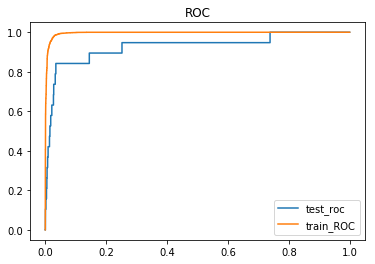

Probability density for train


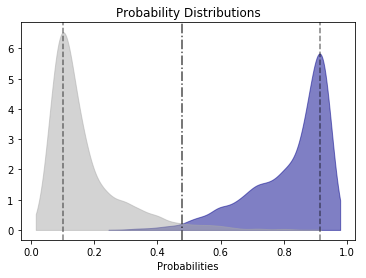

Probability density for test


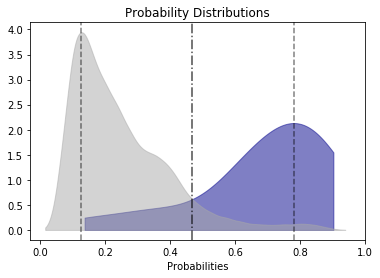


[[199316  13424]
 [     3     16]]
CONFUSION MATRIX
Predicted       0      1     All
Actual                          
0          199316  13424  212740
1               3     16      19
All        199319  13440  212759


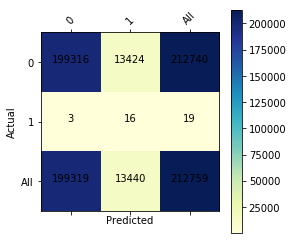


REPORT
             precision    recall  f1-score   support

          0       1.00      0.94      0.97    212740
          1       0.00      0.84      0.00        19

avg / total       1.00      0.94      0.97    212759

ACCURACY =  0.9368910363368882
-----------------


In [11]:
#prediction by chains
chains = list(set(triplexes_test.pdb_chain.values))

print("")
for chain in chains:
    middle_check_test = triplexes_test.loc[triplexes_test['pdb_chain'] == chain]
    middle_target_test = middle_check_test['istriple']
    middle_check_test_ = middle_check_test.iloc[:, 5:475]
    
    prediction_result_by_chain = rf_classifier.predict(middle_check_test_)
    predict_proba_by_chain = rf_classifier.predict_proba(middle_check_test_)


    print("CONFUSION MATRIX By chain: ", chain)
    print(confusion_matrix(middle_target_test, prediction_result_by_chain))
    print("")


#TRY TO PREDICT TRAIN
prediction_train = rf_classifier.predict(triplexes_data)
prediction_prob_train = rf_classifier.predict_proba(triplexes_data)
fpr_train, tpr_train, _ = metrics.roc_curve(triplexes_target,  prediction_prob_train[:, 1])
auc_train = metrics.roc_auc_score(triplexes_target, prediction_prob_train[:, 1])
print("AUC_TRAIN = ", auc_train)
    
#---------------------------------
print("")
fpr, tpr, _ = metrics.roc_curve(triplexes_test_target,  predict_proba[:, 1])
auc = metrics.roc_auc_score(triplexes_test_target, predict_proba[:, 1])
print("AUC = ", auc)
line_test, = plt.plot(fpr, tpr, label='test_roc')
line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
plt.title("ROC")
plt.show()
    
print("Probability density for train")
probability_density(prediction_prob_train[:, 1], triplexes_target)
print("Probability density for test")
probability_density(predict_proba[:, 1], triplexes_test_target)
    
print("")
print(confusion_matrix(triplexes_test_target, prediction_result))
plot_confusion_matrix(pd.crosstab(triplexes_test_target, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))


print("")
print("REPORT")
print(classification_report(triplexes_test_target, prediction_result))
print("ACCURACY = ", accuracy_score(triplexes_test_target, prediction_result))
print("-----------------")
